# Francisco Silva - Desafío - Random Forest

**Requerimientos**

- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable <code>Sale_Price</code>.
- A diferencia de otras sesiones donde implementamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

# Ejercicio 1: Preparación del ambiente de trabajo

- Importe las librerías clásicas a utilizar.
- Para este ejercicio Random Forest de Regresión
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
- Elimine la columna <code>'Unnamed: 0'</code>cuando cargue los datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("ames_housing.csv").drop(columns = 'Unnamed: 0')

df.head(5)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [2]:
df.isnull().sum().sum()
#Nos damos cuenta que no tenemos datos nulos en el dataset

0

# Ejercicio 2: Importación de archivos serializados

- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.

In [3]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


In [4]:
X= df.drop(columns = 'Sale_Price')
y= df.Sale_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

# Ejercicio 3: Evaluación Random Forest

- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [5]:
rf3= RandomForestRegressor, random_state=123).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


In [6]:
y_predict = rf3.predict(X_test)

resultados = pd.DataFrame()

resultados = resultados.append(
    {"model":"rf3",
     "MAE":mean_absolute_error(y_test, y_predict),
     "MSE":mean_squared_error(y_test, y_predict),
     "R2":r2_score(y_test, y_predict)},
     ignore_index=True)
resultados


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,MAE,MSE,R2,model
0,15559.772079,6.336608e+08,0.896967,rf3


In [7]:
import pickle

grid = pickle.load(open("Francisco-Silva-actividad07.sav",'rb'))
grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])})

In [8]:
#Para rescatar los rendimientos del modelo anterior, es necesario saber las predicciones de sólo los 10 atributos usados en el grid
#Por lo que es necesario seleccionar los 10 atributos usados en el grid del desafío anterior
lista_eje4 = ['Garage_Cars',
 'Total_Bsmt_SF',
 'Year_Built',
 'Gr_Liv_Area',
 'Fireplace_Qu_No_Fireplace',
 'Year_Remod_Add',
 'First_Flr_SF',
 'Latitude',
 'Lot_Area',
 'Bsmt_Unf_SF',
 'Sale_Price']

#Definimos el df del ejercicio 4 del desafío anterior
df_eje4 = df[lista_eje4]

#Separar muestras sólo en base a estos 10 atributos
X = df_eje4.drop(columns = 'Sale_Price')
y = df_eje4.Sale_Price

X_train, X_test, y_train, y_test, = train_test_split(X, y , test_size=0.33, random_state=123)

#predecir el set de pruebas
y_pred = grid.predict(X_test)

#finalmente generamos las métricas correspondientes
resultados = resultados.append(
    {"model":"grid_dt",
     "MAE":mean_absolute_error(y_test, y_pred),
     "MSE":mean_squared_error(y_test, y_pred),
     "R2":r2_score(y_test, y_pred)},
     ignore_index=True)
resultados

,MAE,MSE,R2,model
0,15559.772079,6.336608e+08,0.896967,rf3
1,24343.869264,1.438856e+09,0.766042,grid_dt


**Comentarios**

Notamos que el random forest que toma todos los atributos del dataframe muestra un desempeño bastante mejor que el árbol de decisión que sólo toma los 10 mejores atributos definidos en el ejercicio 4 del desafío anterior.

# Ejercicio 4: Reporte las métricas de desempeño

- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño con los siguientes hiperparámetros:
    - max_features: None, log2, sqrt.
    - n_estimators: Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento.

In [33]:
resultados4 = pd.DataFrame()

X= df.drop(columns = 'Sale_Price')
y= df.Sale_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

for i in [None, 'log2', 'sqrt']:
    for j in range(20, 1000, 50):
        tmp_model = RandomForestRegressor(
            n_estimators=int(j),
            max_features=i, 
            random_state=123,
            n_jobs=-1,
            oob_score=True,
            verbose=2).fit(X_train, y_train)
        tmp_y_pred = tmp_model.predict(X_test)
        resultados4 = resultados4.append({"max_features":i,
                                          "n_estimators":j,
                                          "model":str("rf max_features="+str(i)+ " | "+str("n_estimators="+str(int(j)))),
                                          "MAE":mean_absolute_error(y_test, tmp_y_pred),
                                          "MSE":mean_squared_error(y_test, tmp_y_pred),
                                          "R2":r2_score(y_test, tmp_y_pred)
                                         },
                                         ignore_index=True
                                        )


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 20building tree 2 of 20building tree 3 of 20
building tree 4 of 20

building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20

building tree 9 of 20
building tree 10 of 20building tree 11 of 20

building tree 12 of 20
building tree 13 of 20
building tree 14 of 20building tree 15 of 20

building tree 16 of 20
building tree 17 of 20building tree 18 of 20
building tree 19 of 20building tree 20 of 20




[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 70building tree 2 of 70building tree 3 of 70
building tree 4 of 70

building tree 5 of 70

building tree 6 of 70
building tree 7 of 70building tree 8 of 70

building tree 9 of 70building tree 10 of 70
building tree 11 of 70
building tree 12 of 70

building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70building tree 17 of 70
building tree 18 of 70building tree 19 of 70
building tree 20 of 70


building tree 21 of 70
building tree 22 of 70
building tree 23 of 70building tree 24 of 70

building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70building tree 31 of 70
building tree 32 of 70

building tree 33 of 70building tree 34 of 70

building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70building tree 42 of 70

building tree 43 of 70
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 120building tree 2 of 120building tree 3 of 120
building tree 4 of 120

building tree 5 of 120

building tree 6 of 120building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120

building tree 11 of 120building tree 12 of 120

building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120building tree 20 of 120

building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120building tree 26 of 120

building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120building tree 36 of 120

building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 41 of 120building tree 42 of 120

building tree 43 of 120building tree 44 of 120building tree 45 of 120


building tree 46 of 120building tree 47 of 120

building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120building tree 71 of 120

building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80 of 120
building tree 81 of 120
building tree 82

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 170building tree 2 of 170building tree 3 of 170
building tree 4 of 170

building tree 5 of 170

building tree 6 of 170building tree 7 of 170
building tree 8 of 170
building tree 9 of 170

building tree 10 of 170
building tree 11 of 170
building tree 12 of 170
building tree 13 of 170
building tree 14 of 170
building tree 15 of 170
building tree 16 of 170
building tree 17 of 170
building tree 18 of 170
building tree 19 of 170
building tree 20 of 170
building tree 21 of 170
building tree 22 of 170
building tree 23 of 170
building tree 24 of 170
building tree 25 of 170
building tree 26 of 170
building tree 27 of 170
building tree 28 of 170
building tree 29 of 170building tree 30 of 170
building tree 31 of 170

building tree 32 of 170
building tree 33 of 170
building tree 34 of 170building tree 35 of 170building tree 36 of 170


building tree 37 of 170
building tree 38 of 170


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 39 of 170building tree 40 of 170building tree 41 of 170

building tree 42 of 170
building tree 43 of 170

building tree 44 of 170
building tree 45 of 170
building tree 46 of 170
building tree 47 of 170
building tree 48 of 170
building tree 49 of 170
building tree 50 of 170
building tree 51 of 170
building tree 52 of 170building tree 53 of 170

building tree 54 of 170building tree 55 of 170

building tree 56 of 170
building tree 57 of 170
building tree 58 of 170
building tree 59 of 170
building tree 60 of 170
building tree 61 of 170
building tree 62 of 170building tree 63 of 170

building tree 64 of 170
building tree 65 of 170
building tree 66 of 170
building tree 67 of 170
building tree 68 of 170
building tree 69 of 170
building tree 70 of 170
building tree 71 of 170
building tree 72 of 170
building tree 73 of 170
building tree 74 of 170building tree 75 of 170

building tree 76 of 170building tree 77 of 170

building tree 78 of 170
building tree 79 of 170
building tree 80

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    0.8s finished


building tree 167 of 170
building tree 168 of 170
building tree 169 of 170
building tree 170 of 170


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 170 out of 170 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 220building tree 2 of 220building tree 3 of 220
building tree 4 of 220

building tree 5 of 220

building tree 6 of 220
building tree 7 of 220building tree 8 of 220

building tree 9 of 220
building tree 10 of 220building tree 11 of 220
building tree 12 of 220

building tree 13 of 220
building tree 14 of 220
building tree 15 of 220
building tree 16 of 220
building tree 17 of 220
building tree 18 of 220building tree 19 of 220

building tree 20 of 220
building tree 21 of 220
building tree 22 of 220
building tree 23 of 220
building tree 24 of 220
building tree 25 of 220
building tree 26 of 220
building tree 27 of 220
building tree 28 of 220
building tree 29 of 220
building tree 30 of 220building tree 31 of 220
building tree 32 of 220

building tree 33 of 220building tree 34 of 220

building tree 35 of 220
building tree 36 of 220
building tree 37 of 220building tree 38 of 220

building tree 39 of 220
building tree 40 of 220building tree 41 of 220

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s



building tree 42 of 220

building tree 43 of 220building tree 44 of 220

building tree 45 of 220
building tree 46 of 220
building tree 47 of 220building tree 48 of 220

building tree 49 of 220
building tree 50 of 220
building tree 51 of 220
building tree 52 of 220
building tree 53 of 220
building tree 54 of 220
building tree 55 of 220
building tree 56 of 220building tree 57 of 220

building tree 58 of 220
building tree 59 of 220
building tree 60 of 220
building tree 61 of 220
building tree 62 of 220
building tree 63 of 220
building tree 64 of 220
building tree 65 of 220
building tree 66 of 220
building tree 67 of 220
building tree 68 of 220
building tree 69 of 220
building tree 70 of 220
building tree 71 of 220
building tree 72 of 220
building tree 73 of 220
building tree 74 of 220
building tree 75 of 220
building tree 76 of 220
building tree 77 of 220building tree 78 of 220

building tree 79 of 220
building tree 80 of 220
building tree 81 of 220
building tree 82 of 220
building tree 

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 154 of 220
building tree 155 of 220
building tree 156 of 220
building tree 157 of 220
building tree 158 of 220
building tree 159 of 220
building tree 160 of 220
building tree 161 of 220
building tree 162 of 220
building tree 163 of 220
building tree 164 of 220
building tree 165 of 220
building tree 166 of 220
building tree 167 of 220
building tree 168 of 220
building tree 169 of 220
building tree 170 of 220
building tree 171 of 220
building tree 172 of 220
building tree 173 of 220
building tree 174 of 220
building tree 175 of 220
building tree 176 of 220
building tree 177 of 220
building tree 178 of 220
building tree 179 of 220
building tree 180 of 220
building tree 181 of 220
building tree 182 of 220
building tree 183 of 220
building tree 184 of 220
building tree 185 of 220
building tree 186 of 220
building tree 187 of 220
building tree 188 of 220
building tree 189 of 220
building tree 190 of 220
building tree 191 of 220
building tree 192 of 220
building tree 193 of 220


[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 270building tree 2 of 270building tree 3 of 270
building tree 4 of 270

building tree 5 of 270

building tree 6 of 270building tree 7 of 270

building tree 8 of 270building tree 9 of 270
building tree 10 of 270
building tree 11 of 270

building tree 12 of 270
building tree 13 of 270
building tree 14 of 270
building tree 15 of 270
building tree 16 of 270
building tree 17 of 270
building tree 18 of 270building tree 19 of 270
building tree 20 of 270
building tree 21 of 270

building tree 22 of 270
building tree 23 of 270
building tree 24 of 270
building tree 25 of 270
building tree 26 of 270
building tree 27 of 270
building tree 28 of 270
building tree 29 of 270
building tree 30 of 270
building tree 31 of 270building tree 32 of 270
building tree 33 of 270

building tree 34 of 270
building tree 35 of 270
building tree 36 of 270
building tree 37 of 270
building tree 38 of 270
building tree 39 of 270
building tree 40 of 270
building tree 41 of 270
building tree 42 of 270
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 49 of 270
building tree 50 of 270
building tree 51 of 270
building tree 52 of 270
building tree 53 of 270building tree 54 of 270

building tree 55 of 270
building tree 56 of 270
building tree 57 of 270
building tree 58 of 270building tree 59 of 270

building tree 60 of 270
building tree 61 of 270building tree 62 of 270

building tree 63 of 270
building tree 64 of 270
building tree 65 of 270
building tree 66 of 270building tree 67 of 270

building tree 68 of 270building tree 69 of 270

building tree 70 of 270
building tree 71 of 270
building tree 72 of 270
building tree 73 of 270
building tree 74 of 270
building tree 75 of 270
building tree 76 of 270
building tree 77 of 270
building tree 78 of 270
building tree 79 of 270
building tree 80 of 270
building tree 81 of 270
building tree 82 of 270
building tree 83 of 270
building tree 84 of 270
building tree 85 of 270
building tree 86 of 270
building tree 87 of 270
building tree 88 of 270
building tree 89 of 270
building tree 90

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 170 of 270
building tree 171 of 270
building tree 172 of 270
building tree 173 of 270
building tree 174 of 270
building tree 175 of 270
building tree 176 of 270
building tree 177 of 270
building tree 178 of 270building tree 179 of 270

building tree 180 of 270
building tree 181 of 270
building tree 182 of 270
building tree 183 of 270
building tree 184 of 270
building tree 185 of 270
building tree 186 of 270
building tree 187 of 270
building tree 188 of 270
building tree 189 of 270
building tree 190 of 270
building tree 191 of 270building tree 192 of 270

building tree 193 of 270
building tree 194 of 270
building tree 195 of 270
building tree 196 of 270
building tree 197 of 270building tree 198 of 270

building tree 199 of 270building tree 200 of 270

building tree 201 of 270
building tree 202 of 270
building tree 203 of 270
building tree 204 of 270
building tree 205 of 270
building tree 206 of 270
building tree 207 of 270
building tree 208 of 270building tree 209 of 270bu

[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 270 out of 270 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 320building tree 2 of 320building tree 3 of 320
building tree 4 of 320

building tree 5 of 320

building tree 6 of 320
building tree 7 of 320
building tree 8 of 320
building tree 9 of 320
building tree 10 of 320building tree 11 of 320
building tree 12 of 320

building tree 13 of 320
building tree 14 of 320
building tree 15 of 320
building tree 16 of 320
building tree 17 of 320building tree 18 of 320
building tree 19 of 320building tree 20 of 320
building tree 21 of 320building tree 22 of 320



building tree 23 of 320
building tree 24 of 320
building tree 25 of 320
building tree 26 of 320
building tree 27 of 320building tree 28 of 320

building tree 29 of 320building tree 30 of 320

building tree 31 of 320
building tree 32 of 320building tree 33 of 320

building tree 34 of 320building tree 35 of 320

building tree 36 of 320
building tree 37 of 320
building tree 38 of 320
building tree 39 of 320
building tree 40 of 320
building tree 41 of 320


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 42 of 320
building tree 43 of 320
building tree 44 of 320
building tree 45 of 320building tree 46 of 320building tree 47 of 320

building tree 48 of 320

building tree 49 of 320
building tree 50 of 320
building tree 51 of 320
building tree 52 of 320
building tree 53 of 320
building tree 54 of 320building tree 55 of 320

building tree 56 of 320
building tree 57 of 320
building tree 58 of 320
building tree 59 of 320
building tree 60 of 320
building tree 61 of 320
building tree 62 of 320
building tree 63 of 320
building tree 64 of 320
building tree 65 of 320
building tree 66 of 320
building tree 67 of 320
building tree 68 of 320
building tree 69 of 320building tree 70 of 320

building tree 71 of 320
building tree 72 of 320
building tree 73 of 320
building tree 74 of 320
building tree 75 of 320
building tree 76 of 320
building tree 77 of 320building tree 78 of 320

building tree 79 of 320
building tree 80 of 320
building tree 81 of 320building tree 82 of 320

building tree 83

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 169 of 320
building tree 170 of 320
building tree 171 of 320
building tree 172 of 320building tree 173 of 320building tree 174 of 320
building tree 175 of 320


building tree 176 of 320
building tree 177 of 320
building tree 178 of 320
building tree 179 of 320
building tree 180 of 320
building tree 181 of 320
building tree 182 of 320
building tree 183 of 320
building tree 184 of 320
building tree 185 of 320building tree 186 of 320building tree 187 of 320


building tree 188 of 320
building tree 189 of 320
building tree 190 of 320
building tree 191 of 320
building tree 192 of 320
building tree 193 of 320
building tree 194 of 320
building tree 195 of 320
building tree 196 of 320
building tree 197 of 320
building tree 198 of 320
building tree 199 of 320
building tree 200 of 320
building tree 201 of 320
building tree 202 of 320building tree 203 of 320

building tree 204 of 320
building tree 205 of 320
building tree 206 of 320building tree 207 of 320building tree 208 of 320




[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 320 out of 320 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 370building tree 2 of 370building tree 3 of 370
building tree 4 of 370

building tree 5 of 370
building tree 6 of 370

building tree 7 of 370
building tree 8 of 370
building tree 9 of 370
building tree 10 of 370
building tree 11 of 370
building tree 12 of 370
building tree 13 of 370
building tree 14 of 370
building tree 15 of 370building tree 16 of 370building tree 17 of 370


building tree 18 of 370
building tree 19 of 370building tree 20 of 370

building tree 21 of 370
building tree 22 of 370building tree 23 of 370

building tree 24 of 370
building tree 25 of 370
building tree 26 of 370building tree 27 of 370building tree 28 of 370building tree 29 of 370


building tree 30 of 370building tree 31 of 370
building tree 32 of 370
building tree 33 of 370


building tree 34 of 370
building tree 35 of 370building tree 36 of 370

building tree 37 of 370building tree 38 of 370



[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 39 of 370building tree 40 of 370
building tree 41 of 370building tree 42 of 370
building tree 43 of 370


building tree 44 of 370
building tree 45 of 370
building tree 46 of 370
building tree 47 of 370
building tree 48 of 370
building tree 49 of 370
building tree 50 of 370
building tree 51 of 370
building tree 52 of 370
building tree 53 of 370
building tree 54 of 370
building tree 55 of 370
building tree 56 of 370
building tree 57 of 370
building tree 58 of 370
building tree 59 of 370
building tree 60 of 370
building tree 61 of 370
building tree 62 of 370
building tree 63 of 370
building tree 64 of 370
building tree 65 of 370
building tree 66 of 370
building tree 67 of 370
building tree 68 of 370building tree 69 of 370

building tree 70 of 370
building tree 71 of 370
building tree 72 of 370
building tree 73 of 370
building tree 74 of 370
building tree 75 of 370
building tree 76 of 370
building tree 77 of 370
building tree 78 of 370
building tree 79 of 370
building tree 80

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 157 of 370
building tree 158 of 370
building tree 159 of 370
building tree 160 of 370
building tree 161 of 370
building tree 162 of 370
building tree 163 of 370
building tree 164 of 370
building tree 165 of 370
building tree 166 of 370
building tree 167 of 370
building tree 168 of 370
building tree 169 of 370
building tree 170 of 370
building tree 171 of 370
building tree 172 of 370
building tree 173 of 370
building tree 174 of 370
building tree 175 of 370
building tree 176 of 370
building tree 177 of 370
building tree 178 of 370
building tree 179 of 370
building tree 180 of 370
building tree 181 of 370
building tree 182 of 370
building tree 183 of 370
building tree 184 of 370
building tree 185 of 370
building tree 186 of 370
building tree 187 of 370
building tree 188 of 370
building tree 189 of 370
building tree 190 of 370
building tree 191 of 370
building tree 192 of 370
building tree 193 of 370
building tree 194 of 370
building tree 195 of 370
building tree 196 of 370


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 370 out of 370 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 420building tree 2 of 420building tree 3 of 420
building tree 4 of 420


building tree 5 of 420building tree 6 of 420

building tree 7 of 420building tree 8 of 420
building tree 9 of 420
building tree 10 of 420
building tree 11 of 420building tree 12 of 420


building tree 13 of 420
building tree 14 of 420building tree 15 of 420

building tree 16 of 420
building tree 17 of 420
building tree 18 of 420
building tree 19 of 420
building tree 20 of 420
building tree 21 of 420
building tree 22 of 420
building tree 23 of 420
building tree 24 of 420
building tree 25 of 420
building tree 26 of 420
building tree 27 of 420
building tree 28 of 420
building tree 29 of 420
building tree 30 of 420
building tree 31 of 420
building tree 32 of 420
building tree 33 of 420
building tree 34 of 420
building tree 35 of 420
building tree 36 of 420
building tree 37 of 420
building tree 38 of 420
building tree 39 of 420
building tree 40 of 420
building tree 41 of 420
building tree 42 of 420
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 49 of 420
building tree 50 of 420
building tree 51 of 420
building tree 52 of 420
building tree 53 of 420
building tree 54 of 420
building tree 55 of 420
building tree 56 of 420
building tree 57 of 420
building tree 58 of 420
building tree 59 of 420
building tree 60 of 420
building tree 61 of 420
building tree 62 of 420
building tree 63 of 420
building tree 64 of 420
building tree 65 of 420
building tree 66 of 420
building tree 67 of 420
building tree 68 of 420
building tree 69 of 420
building tree 70 of 420
building tree 71 of 420
building tree 72 of 420
building tree 73 of 420
building tree 74 of 420
building tree 75 of 420
building tree 76 of 420
building tree 77 of 420
building tree 78 of 420
building tree 79 of 420
building tree 80 of 420
building tree 81 of 420
building tree 82 of 420
building tree 83 of 420
building tree 84 of 420
building tree 85 of 420
building tree 86 of 420
building tree 87 of 420
building tree 88 of 420
building tree 89 of 420
building tree 90

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s



building tree 170 of 420
building tree 171 of 420
building tree 172 of 420
building tree 173 of 420
building tree 174 of 420
building tree 175 of 420
building tree 176 of 420building tree 177 of 420

building tree 178 of 420
building tree 179 of 420
building tree 180 of 420
building tree 181 of 420
building tree 182 of 420
building tree 183 of 420
building tree 184 of 420
building tree 185 of 420
building tree 186 of 420
building tree 187 of 420
building tree 188 of 420
building tree 189 of 420building tree 190 of 420

building tree 191 of 420
building tree 192 of 420
building tree 193 of 420
building tree 194 of 420
building tree 195 of 420
building tree 196 of 420
building tree 197 of 420
building tree 198 of 420
building tree 199 of 420
building tree 200 of 420building tree 201 of 420

building tree 202 of 420
building tree 203 of 420
building tree 204 of 420
building tree 205 of 420
building tree 206 of 420
building tree 207 of 420
building tree 208 of 420
building tree 209 of 420

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 367 of 420
building tree 368 of 420building tree 369 of 420

building tree 370 of 420building tree 371 of 420

building tree 372 of 420
building tree 373 of 420
building tree 374 of 420
building tree 375 of 420
building tree 376 of 420
building tree 377 of 420
building tree 378 of 420
building tree 379 of 420
building tree 380 of 420building tree 381 of 420

building tree 382 of 420
building tree 383 of 420
building tree 384 of 420
building tree 385 of 420
building tree 386 of 420
building tree 387 of 420
building tree 388 of 420building tree 389 of 420

building tree 390 of 420
building tree 391 of 420
building tree 392 of 420
building tree 393 of 420
building tree 394 of 420
building tree 395 of 420
building tree 396 of 420
building tree 397 of 420
building tree 398 of 420
building tree 399 of 420
building tree 400 of 420
building tree 401 of 420
building tree 402 of 420
building tree 403 of 420
building tree 404 of 420
building tree 405 of 420
building tree 406 of 420


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 420 out of 420 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 470building tree 2 of 470building tree 3 of 470

building tree 4 of 470

building tree 5 of 470building tree 6 of 470

building tree 7 of 470
building tree 8 of 470building tree 9 of 470

building tree 10 of 470
building tree 11 of 470
building tree 12 of 470
building tree 13 of 470
building tree 14 of 470
building tree 15 of 470
building tree 16 of 470building tree 17 of 470
building tree 18 of 470building tree 19 of 470

building tree 20 of 470

building tree 21 of 470
building tree 22 of 470
building tree 23 of 470
building tree 24 of 470
building tree 25 of 470
building tree 26 of 470
building tree 27 of 470building tree 28 of 470
building tree 29 of 470
building tree 30 of 470
building tree 31 of 470

building tree 32 of 470building tree 33 of 470
building tree 34 of 470
building tree 35 of 470

building tree 36 of 470
building tree 37 of 470
building tree 38 of 470
building tree 39 of 470building tree 40 of 470building tree 41 of 470

building tree 42 of 470

b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 49 of 470
building tree 50 of 470
building tree 51 of 470
building tree 52 of 470
building tree 53 of 470
building tree 54 of 470
building tree 55 of 470
building tree 56 of 470
building tree 57 of 470
building tree 58 of 470
building tree 59 of 470
building tree 60 of 470
building tree 61 of 470
building tree 62 of 470building tree 63 of 470

building tree 64 of 470
building tree 65 of 470
building tree 66 of 470
building tree 67 of 470
building tree 68 of 470
building tree 69 of 470
building tree 70 of 470
building tree 71 of 470
building tree 72 of 470
building tree 73 of 470
building tree 74 of 470
building tree 75 of 470
building tree 76 of 470
building tree 77 of 470
building tree 78 of 470
building tree 79 of 470
building tree 80 of 470
building tree 81 of 470
building tree 82 of 470building tree 83 of 470

building tree 84 of 470
building tree 85 of 470
building tree 86 of 470
building tree 87 of 470building tree 88 of 470

building tree 89 of 470
building tree 90

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s



building tree 174 of 470
building tree 175 of 470building tree 176 of 470

building tree 177 of 470
building tree 178 of 470
building tree 179 of 470
building tree 180 of 470
building tree 181 of 470
building tree 182 of 470
building tree 183 of 470
building tree 184 of 470
building tree 185 of 470
building tree 186 of 470
building tree 187 of 470
building tree 188 of 470
building tree 189 of 470
building tree 190 of 470
building tree 191 of 470
building tree 192 of 470
building tree 193 of 470
building tree 194 of 470
building tree 195 of 470
building tree 196 of 470
building tree 197 of 470
building tree 198 of 470
building tree 199 of 470
building tree 200 of 470
building tree 201 of 470
building tree 202 of 470
building tree 203 of 470
building tree 204 of 470
building tree 205 of 470
building tree 206 of 470
building tree 207 of 470
building tree 208 of 470
building tree 209 of 470
building tree 210 of 470
building tree 211 of 470
building tree 212 of 470building tree 213 of 470


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 379 of 470
building tree 380 of 470
building tree 381 of 470
building tree 382 of 470
building tree 383 of 470
building tree 384 of 470
building tree 385 of 470
building tree 386 of 470
building tree 387 of 470
building tree 388 of 470
building tree 389 of 470
building tree 390 of 470
building tree 391 of 470
building tree 392 of 470
building tree 393 of 470
building tree 394 of 470
building tree 395 of 470
building tree 396 of 470
building tree 397 of 470
building tree 398 of 470
building tree 399 of 470
building tree 400 of 470
building tree 401 of 470
building tree 402 of 470
building tree 403 of 470
building tree 404 of 470
building tree 405 of 470
building tree 406 of 470
building tree 407 of 470
building tree 408 of 470
building tree 409 of 470
building tree 410 of 470
building tree 411 of 470
building tree 412 of 470
building tree 413 of 470
building tree 414 of 470
building tree 415 of 470
building tree 416 of 470
building tree 417 of 470building tree 418 of 470



[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 470 out of 470 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 520building tree 2 of 520building tree 3 of 520
building tree 4 of 520

building tree 5 of 520

building tree 6 of 520
building tree 7 of 520building tree 8 of 520
building tree 9 of 520

building tree 10 of 520building tree 11 of 520
building tree 12 of 520

building tree 13 of 520
building tree 14 of 520
building tree 15 of 520
building tree 16 of 520
building tree 17 of 520
building tree 18 of 520
building tree 19 of 520
building tree 20 of 520building tree 21 of 520

building tree 22 of 520building tree 23 of 520building tree 24 of 520


building tree 25 of 520
building tree 26 of 520
building tree 27 of 520
building tree 28 of 520
building tree 29 of 520
building tree 30 of 520building tree 31 of 520
building tree 32 of 520

building tree 33 of 520building tree 34 of 520building tree 35 of 520


building tree 36 of 520
building tree 37 of 520
building tree 38 of 520
building tree 39 of 520
building tree 40 of 520


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 41 of 520
building tree 42 of 520
building tree 43 of 520building tree 44 of 520

building tree 45 of 520building tree 46 of 520

building tree 47 of 520building tree 48 of 520

building tree 49 of 520
building tree 50 of 520
building tree 51 of 520
building tree 52 of 520
building tree 53 of 520
building tree 54 of 520building tree 55 of 520

building tree 56 of 520
building tree 57 of 520
building tree 58 of 520
building tree 59 of 520
building tree 60 of 520
building tree 61 of 520building tree 62 of 520

building tree 63 of 520
building tree 64 of 520building tree 65 of 520

building tree 66 of 520
building tree 67 of 520building tree 68 of 520
building tree 69 of 520

building tree 70 of 520
building tree 71 of 520
building tree 72 of 520
building tree 73 of 520
building tree 74 of 520
building tree 75 of 520
building tree 76 of 520
building tree 77 of 520
building tree 78 of 520
building tree 79 of 520
building tree 80 of 520
building tree 81 of 520
building tree 82

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 169 of 520
building tree 170 of 520building tree 171 of 520
building tree 172 of 520

building tree 173 of 520
building tree 174 of 520
building tree 175 of 520
building tree 176 of 520building tree 177 of 520

building tree 178 of 520
building tree 179 of 520
building tree 180 of 520
building tree 181 of 520
building tree 182 of 520
building tree 183 of 520building tree 184 of 520
building tree 185 of 520

building tree 186 of 520building tree 187 of 520building tree 188 of 520


building tree 189 of 520
building tree 190 of 520
building tree 191 of 520building tree 192 of 520

building tree 193 of 520building tree 194 of 520

building tree 195 of 520
building tree 196 of 520building tree 197 of 520
building tree 198 of 520

building tree 199 of 520
building tree 200 of 520
building tree 201 of 520
building tree 202 of 520
building tree 203 of 520
building tree 204 of 520
building tree 205 of 520
building tree 206 of 520
building tree 207 of 520
building tree 208 of 520


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 374 of 520
building tree 375 of 520
building tree 376 of 520
building tree 377 of 520
building tree 378 of 520
building tree 379 of 520
building tree 380 of 520
building tree 381 of 520
building tree 382 of 520
building tree 383 of 520
building tree 384 of 520
building tree 385 of 520
building tree 386 of 520
building tree 387 of 520
building tree 388 of 520
building tree 389 of 520
building tree 390 of 520building tree 391 of 520

building tree 392 of 520
building tree 393 of 520
building tree 394 of 520
building tree 395 of 520
building tree 396 of 520
building tree 397 of 520
building tree 398 of 520
building tree 399 of 520
building tree 400 of 520
building tree 401 of 520
building tree 402 of 520
building tree 403 of 520
building tree 404 of 520
building tree 405 of 520
building tree 406 of 520
building tree 407 of 520
building tree 408 of 520
building tree 409 of 520
building tree 410 of 520
building tree 411 of 520
building tree 412 of 520
building tree 413 of 520


[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 520 out of 520 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 570building tree 2 of 570building tree 3 of 570
building tree 4 of 570

building tree 5 of 570

building tree 6 of 570
building tree 7 of 570building tree 8 of 570

building tree 9 of 570
building tree 10 of 570
building tree 11 of 570
building tree 12 of 570
building tree 13 of 570
building tree 14 of 570
building tree 15 of 570
building tree 16 of 570
building tree 17 of 570building tree 18 of 570
building tree 19 of 570building tree 20 of 570

building tree 21 of 570
building tree 22 of 570building tree 23 of 570


building tree 24 of 570
building tree 25 of 570
building tree 26 of 570
building tree 27 of 570building tree 28 of 570

building tree 29 of 570building tree 30 of 570
building tree 31 of 570

building tree 32 of 570
building tree 33 of 570
building tree 34 of 570building tree 35 of 570
building tree 36 of 570

building tree 37 of 570
building tree 38 of 570
building tree 39 of 570
building tree 40 of 570
building tree 41 of 570
building tree 42 of 570
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 49 of 570
building tree 50 of 570
building tree 51 of 570
building tree 52 of 570building tree 53 of 570

building tree 54 of 570
building tree 55 of 570
building tree 56 of 570
building tree 57 of 570building tree 58 of 570

building tree 59 of 570
building tree 60 of 570
building tree 61 of 570
building tree 62 of 570
building tree 63 of 570
building tree 64 of 570building tree 65 of 570

building tree 66 of 570building tree 67 of 570

building tree 68 of 570
building tree 69 of 570
building tree 70 of 570
building tree 71 of 570
building tree 72 of 570
building tree 73 of 570
building tree 74 of 570
building tree 75 of 570
building tree 76 of 570
building tree 77 of 570building tree 78 of 570
building tree 79 of 570

building tree 80 of 570
building tree 81 of 570
building tree 82 of 570
building tree 83 of 570
building tree 84 of 570
building tree 85 of 570
building tree 86 of 570
building tree 87 of 570
building tree 88 of 570
building tree 89 of 570
building tree 90

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 173 of 570building tree 174 of 570

building tree 175 of 570building tree 176 of 570
building tree 177 of 570building tree 178 of 570


building tree 179 of 570building tree 180 of 570

building tree 181 of 570
building tree 182 of 570
building tree 183 of 570building tree 184 of 570

building tree 185 of 570
building tree 186 of 570
building tree 187 of 570
building tree 188 of 570
building tree 189 of 570building tree 190 of 570

building tree 191 of 570
building tree 192 of 570
building tree 193 of 570
building tree 194 of 570building tree 195 of 570

building tree 196 of 570
building tree 197 of 570
building tree 198 of 570
building tree 199 of 570
building tree 200 of 570
building tree 201 of 570
building tree 202 of 570
building tree 203 of 570
building tree 204 of 570
building tree 205 of 570
building tree 206 of 570
building tree 207 of 570
building tree 208 of 570
building tree 209 of 570
building tree 210 of 570
building tree 211 of 570
building tree 212 of 570


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 392 of 570building tree 393 of 570

building tree 394 of 570building tree 395 of 570building tree 396 of 570


building tree 397 of 570
building tree 398 of 570building tree 399 of 570

building tree 400 of 570
building tree 401 of 570
building tree 402 of 570
building tree 403 of 570
building tree 404 of 570
building tree 405 of 570
building tree 406 of 570
building tree 407 of 570
building tree 408 of 570
building tree 409 of 570
building tree 410 of 570
building tree 411 of 570
building tree 412 of 570
building tree 413 of 570
building tree 414 of 570building tree 415 of 570

building tree 416 of 570
building tree 417 of 570
building tree 418 of 570
building tree 419 of 570
building tree 420 of 570
building tree 421 of 570
building tree 422 of 570
building tree 423 of 570
building tree 424 of 570building tree 425 of 570

building tree 426 of 570
building tree 427 of 570building tree 428 of 570

building tree 429 of 570
building tree 430 of 570
building tree 431 of 570


[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:    2.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 570 out of 570 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 620building tree 2 of 620building tree 3 of 620

building tree 4 of 620

building tree 5 of 620
building tree 6 of 620
building tree 7 of 620building tree 8 of 620
building tree 9 of 620

building tree 10 of 620
building tree 11 of 620building tree 12 of 620

building tree 13 of 620
building tree 14 of 620
building tree 15 of 620
building tree 16 of 620building tree 17 of 620
building tree 18 of 620

building tree 19 of 620
building tree 20 of 620building tree 21 of 620

building tree 22 of 620
building tree 23 of 620
building tree 24 of 620
building tree 25 of 620
building tree 26 of 620
building tree 27 of 620
building tree 28 of 620building tree 29 of 620

building tree 30 of 620
building tree 31 of 620
building tree 32 of 620
building tree 33 of 620
building tree 34 of 620
building tree 35 of 620
building tree 36 of 620
building tree 37 of 620
building tree 38 of 620
building tree 39 of 620building tree 40 of 620

building tree 41 of 620
building tree 42 of 620
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 181 of 620
building tree 182 of 620building tree 183 of 620building tree 184 of 620

building tree 185 of 620building tree 186 of 620building tree 187 of 620



building tree 188 of 620building tree 189 of 620
building tree 190 of 620building tree 191 of 620


building tree 192 of 620
building tree 193 of 620
building tree 194 of 620
building tree 195 of 620building tree 196 of 620

building tree 197 of 620building tree 198 of 620

building tree 199 of 620building tree 200 of 620

building tree 201 of 620
building tree 202 of 620
building tree 203 of 620
building tree 204 of 620
building tree 205 of 620
building tree 206 of 620
building tree 207 of 620
building tree 208 of 620
building tree 209 of 620
building tree 210 of 620
building tree 211 of 620
building tree 212 of 620
building tree 213 of 620
building tree 214 of 620
building tree 215 of 620
building tree 216 of 620
building tree 217 of 620building tree 218 of 620

building tree 219 of 620
building tree 220 of 620b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 354 of 620
building tree 355 of 620

building tree 356 of 620
building tree 357 of 620
building tree 358 of 620
building tree 359 of 620
building tree 360 of 620
building tree 361 of 620
building tree 362 of 620
building tree 363 of 620
building tree 364 of 620building tree 365 of 620

building tree 366 of 620
building tree 367 of 620
building tree 368 of 620
building tree 369 of 620
building tree 370 of 620building tree 371 of 620

building tree 372 of 620
building tree 373 of 620
building tree 374 of 620
building tree 375 of 620building tree 376 of 620

building tree 377 of 620
building tree 378 of 620
building tree 379 of 620
building tree 380 of 620building tree 381 of 620building tree 382 of 620


building tree 383 of 620
building tree 384 of 620
building tree 385 of 620
building tree 386 of 620
building tree 387 of 620
building tree 388 of 620
building tree 389 of 620building tree 390 of 620

building tree 391 of 620
building tree 392 of 620
building tree 393 of 620

[Parallel(n_jobs=-1)]: Done 620 out of 620 | elapsed:    2.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 620 out of 620 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 670building tree 2 of 670building tree 3 of 670
building tree 4 of 670


building tree 5 of 670building tree 6 of 670

building tree 7 of 670building tree 8 of 670
building tree 9 of 670building tree 10 of 670

building tree 11 of 670
building tree 12 of 670

building tree 13 of 670
building tree 14 of 670
building tree 15 of 670
building tree 16 of 670building tree 17 of 670

building tree 18 of 670building tree 19 of 670building tree 20 of 670
building tree 21 of 670


building tree 22 of 670
building tree 23 of 670
building tree 24 of 670
building tree 25 of 670
building tree 26 of 670
building tree 27 of 670
building tree 28 of 670
building tree 29 of 670
building tree 30 of 670
building tree 31 of 670
building tree 32 of 670
building tree 33 of 670
building tree 34 of 670building tree 35 of 670

building tree 36 of 670
building tree 37 of 670
building tree 38 of 670
building tree 39 of 670
building tree 40 of 670
building tree 41 of 670
building tree 42 of 670
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 170 of 670
building tree 171 of 670building tree 172 of 670

building tree 173 of 670
building tree 174 of 670
building tree 175 of 670
building tree 176 of 670building tree 177 of 670

building tree 178 of 670
building tree 179 of 670
building tree 180 of 670
building tree 181 of 670
building tree 182 of 670building tree 183 of 670

building tree 184 of 670
building tree 185 of 670
building tree 186 of 670
building tree 187 of 670
building tree 188 of 670
building tree 189 of 670
building tree 190 of 670
building tree 191 of 670
building tree 192 of 670
building tree 193 of 670
building tree 194 of 670
building tree 195 of 670
building tree 196 of 670
building tree 197 of 670
building tree 198 of 670
building tree 199 of 670
building tree 200 of 670
building tree 201 of 670
building tree 202 of 670
building tree 203 of 670
building tree 204 of 670
building tree 205 of 670
building tree 206 of 670
building tree 207 of 670
building tree 208 of 670
building tree 209 of 670


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.9s


building tree 365 of 670
building tree 366 of 670
building tree 367 of 670
building tree 368 of 670
building tree 369 of 670
building tree 370 of 670
building tree 371 of 670
building tree 372 of 670building tree 373 of 670

building tree 374 of 670
building tree 375 of 670
building tree 376 of 670
building tree 377 of 670
building tree 378 of 670
building tree 379 of 670
building tree 380 of 670
building tree 381 of 670
building tree 382 of 670
building tree 383 of 670
building tree 384 of 670
building tree 385 of 670
building tree 386 of 670
building tree 387 of 670
building tree 388 of 670
building tree 389 of 670building tree 390 of 670

building tree 391 of 670
building tree 392 of 670
building tree 393 of 670
building tree 394 of 670
building tree 395 of 670
building tree 396 of 670
building tree 397 of 670
building tree 398 of 670
building tree 399 of 670
building tree 400 of 670
building tree 401 of 670
building tree 402 of 670
building tree 403 of 670
building tree 404 of 670


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.6s


building tree 656 of 670building tree 657 of 670

building tree 658 of 670
building tree 659 of 670
building tree 660 of 670
building tree 661 of 670
building tree 662 of 670
building tree 663 of 670
building tree 664 of 670
building tree 665 of 670
building tree 666 of 670
building tree 667 of 670
building tree 668 of 670
building tree 669 of 670
building tree 670 of 670


[Parallel(n_jobs=-1)]: Done 670 out of 670 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 670 out of 670 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 720building tree 2 of 720building tree 3 of 720
building tree 4 of 720

building tree 5 of 720

building tree 6 of 720
building tree 7 of 720
building tree 8 of 720
building tree 9 of 720building tree 10 of 720

building tree 11 of 720
building tree 12 of 720
building tree 13 of 720
building tree 14 of 720
building tree 15 of 720
building tree 16 of 720
building tree 17 of 720
building tree 18 of 720building tree 19 of 720

building tree 20 of 720
building tree 21 of 720
building tree 22 of 720
building tree 23 of 720
building tree 24 of 720
building tree 25 of 720
building tree 26 of 720
building tree 27 of 720
building tree 28 of 720
building tree 29 of 720
building tree 30 of 720building tree 31 of 720

building tree 32 of 720
building tree 33 of 720
building tree 34 of 720
building tree 35 of 720
building tree 36 of 720
building tree 37 of 720
building tree 38 of 720
building tree 39 of 720
building tree 40 of 720
building tree 41 of 720building tree 42 of 720

b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 177 of 720
building tree 178 of 720
building tree 179 of 720building tree 180 of 720

building tree 181 of 720
building tree 182 of 720
building tree 183 of 720
building tree 184 of 720
building tree 185 of 720
building tree 186 of 720
building tree 187 of 720building tree 188 of 720building tree 189 of 720


building tree 190 of 720
building tree 191 of 720
building tree 192 of 720
building tree 193 of 720
building tree 194 of 720
building tree 195 of 720
building tree 196 of 720
building tree 197 of 720
building tree 198 of 720
building tree 199 of 720
building tree 200 of 720
building tree 201 of 720
building tree 202 of 720
building tree 203 of 720
building tree 204 of 720
building tree 205 of 720
building tree 206 of 720
building tree 207 of 720
building tree 208 of 720
building tree 209 of 720
building tree 210 of 720
building tree 211 of 720
building tree 212 of 720
building tree 213 of 720
building tree 214 of 720building tree 215 of 720

building tree 216 of 720


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.8s



building tree 354 of 720
building tree 355 of 720
building tree 356 of 720
building tree 357 of 720
building tree 358 of 720
building tree 359 of 720
building tree 360 of 720
building tree 361 of 720
building tree 362 of 720
building tree 363 of 720
building tree 364 of 720
building tree 365 of 720
building tree 366 of 720
building tree 367 of 720
building tree 368 of 720
building tree 369 of 720
building tree 370 of 720
building tree 371 of 720
building tree 372 of 720
building tree 373 of 720
building tree 374 of 720
building tree 375 of 720
building tree 376 of 720
building tree 377 of 720
building tree 378 of 720
building tree 379 of 720
building tree 380 of 720
building tree 381 of 720
building tree 382 of 720
building tree 383 of 720
building tree 384 of 720
building tree 385 of 720
building tree 386 of 720
building tree 387 of 720
building tree 388 of 720
building tree 389 of 720
building tree 390 of 720
building tree 391 of 720
building tree 392 of 720
building tree 393 of 720

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.4s


building tree 669 of 720
building tree 670 of 720
building tree 671 of 720
building tree 672 of 720
building tree 673 of 720
building tree 674 of 720
building tree 675 of 720
building tree 676 of 720
building tree 677 of 720
building tree 678 of 720
building tree 679 of 720
building tree 680 of 720
building tree 681 of 720
building tree 682 of 720
building tree 683 of 720
building tree 684 of 720
building tree 685 of 720
building tree 686 of 720
building tree 687 of 720
building tree 688 of 720
building tree 689 of 720
building tree 690 of 720
building tree 691 of 720
building tree 692 of 720
building tree 693 of 720
building tree 694 of 720
building tree 695 of 720
building tree 696 of 720
building tree 697 of 720
building tree 698 of 720
building tree 699 of 720
building tree 700 of 720
building tree 701 of 720
building tree 702 of 720
building tree 703 of 720
building tree 704 of 720
building tree 705 of 720
building tree 706 of 720
building tree 707 of 720
building tree 708 of 720


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 720 out of 720 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 770building tree 2 of 770building tree 3 of 770
building tree 4 of 770


building tree 5 of 770building tree 6 of 770
building tree 7 of 770
building tree 8 of 770

building tree 9 of 770building tree 10 of 770
building tree 11 of 770

building tree 12 of 770
building tree 13 of 770building tree 14 of 770

building tree 15 of 770
building tree 16 of 770
building tree 17 of 770
building tree 18 of 770building tree 19 of 770
building tree 20 of 770

building tree 21 of 770
building tree 22 of 770building tree 23 of 770
building tree 24 of 770

building tree 25 of 770
building tree 26 of 770
building tree 27 of 770
building tree 28 of 770
building tree 29 of 770
building tree 30 of 770
building tree 31 of 770
building tree 32 of 770
building tree 33 of 770
building tree 34 of 770
building tree 35 of 770
building tree 36 of 770
building tree 37 of 770
building tree 38 of 770
building tree 39 of 770
building tree 40 of 770
building tree 41 of 770
building tree 42 of 770
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 153 of 770
building tree 154 of 770
building tree 155 of 770
building tree 156 of 770
building tree 157 of 770
building tree 158 of 770
building tree 159 of 770
building tree 160 of 770
building tree 161 of 770
building tree 162 of 770
building tree 163 of 770
building tree 164 of 770
building tree 165 of 770
building tree 166 of 770
building tree 167 of 770
building tree 168 of 770
building tree 169 of 770
building tree 170 of 770
building tree 171 of 770
building tree 172 of 770
building tree 173 of 770
building tree 174 of 770
building tree 175 of 770
building tree 176 of 770
building tree 177 of 770
building tree 178 of 770
building tree 179 of 770
building tree 180 of 770
building tree 181 of 770
building tree 182 of 770
building tree 183 of 770
building tree 184 of 770
building tree 185 of 770
building tree 186 of 770
building tree 187 of 770building tree 188 of 770

building tree 189 of 770
building tree 190 of 770
building tree 191 of 770
building tree 192 of 770


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.7s


building tree 369 of 770
building tree 370 of 770
building tree 371 of 770
building tree 372 of 770
building tree 373 of 770
building tree 374 of 770
building tree 375 of 770
building tree 376 of 770
building tree 377 of 770
building tree 378 of 770
building tree 379 of 770
building tree 380 of 770
building tree 381 of 770building tree 382 of 770

building tree 383 of 770
building tree 384 of 770
building tree 385 of 770
building tree 386 of 770
building tree 387 of 770
building tree 388 of 770
building tree 389 of 770
building tree 390 of 770
building tree 391 of 770
building tree 392 of 770
building tree 393 of 770
building tree 394 of 770
building tree 395 of 770building tree 396 of 770

building tree 397 of 770
building tree 398 of 770
building tree 399 of 770
building tree 400 of 770
building tree 401 of 770
building tree 402 of 770
building tree 403 of 770
building tree 404 of 770
building tree 405 of 770
building tree 406 of 770
building tree 407 of 770
building tree 408 of 770


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.3s


building tree 650 of 770
building tree 651 of 770
building tree 652 of 770
building tree 653 of 770
building tree 654 of 770
building tree 655 of 770
building tree 656 of 770
building tree 657 of 770
building tree 658 of 770
building tree 659 of 770
building tree 660 of 770
building tree 661 of 770
building tree 662 of 770
building tree 663 of 770
building tree 664 of 770
building tree 665 of 770
building tree 666 of 770
building tree 667 of 770
building tree 668 of 770
building tree 669 of 770building tree 670 of 770

building tree 671 of 770
building tree 672 of 770
building tree 673 of 770
building tree 674 of 770
building tree 675 of 770
building tree 676 of 770
building tree 677 of 770
building tree 678 of 770
building tree 679 of 770
building tree 680 of 770
building tree 681 of 770
building tree 682 of 770
building tree 683 of 770
building tree 684 of 770
building tree 685 of 770
building tree 686 of 770
building tree 687 of 770
building tree 688 of 770
building tree 689 of 770


[Parallel(n_jobs=-1)]: Done 770 out of 770 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 770 out of 770 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 820building tree 2 of 820building tree 3 of 820
building tree 4 of 820

building tree 5 of 820
building tree 6 of 820
building tree 7 of 820

building tree 8 of 820
building tree 9 of 820building tree 10 of 820

building tree 11 of 820
building tree 12 of 820
building tree 13 of 820
building tree 14 of 820
building tree 15 of 820building tree 16 of 820building tree 17 of 820


building tree 18 of 820building tree 19 of 820

building tree 20 of 820
building tree 21 of 820
building tree 22 of 820
building tree 23 of 820
building tree 24 of 820
building tree 25 of 820
building tree 26 of 820
building tree 27 of 820
building tree 28 of 820building tree 29 of 820

building tree 30 of 820building tree 31 of 820

building tree 32 of 820
building tree 33 of 820
building tree 34 of 820
building tree 35 of 820
building tree 36 of 820
building tree 37 of 820
building tree 38 of 820
building tree 39 of 820
building tree 40 of 820
building tree 41 of 820
building tree 42 of 820
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 179 of 820
building tree 180 of 820
building tree 181 of 820
building tree 182 of 820
building tree 183 of 820
building tree 184 of 820building tree 185 of 820

building tree 186 of 820
building tree 187 of 820building tree 188 of 820

building tree 189 of 820
building tree 190 of 820
building tree 191 of 820
building tree 192 of 820
building tree 193 of 820
building tree 194 of 820
building tree 195 of 820
building tree 196 of 820
building tree 197 of 820
building tree 198 of 820
building tree 199 of 820
building tree 200 of 820
building tree 201 of 820
building tree 202 of 820
building tree 203 of 820
building tree 204 of 820
building tree 205 of 820
building tree 206 of 820
building tree 207 of 820
building tree 208 of 820
building tree 209 of 820building tree 210 of 820

building tree 211 of 820
building tree 212 of 820
building tree 213 of 820
building tree 214 of 820
building tree 215 of 820
building tree 216 of 820
building tree 217 of 820
building tree 218 of 820


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.8s


building tree 357 of 820
building tree 358 of 820
building tree 359 of 820
building tree 360 of 820
building tree 361 of 820building tree 362 of 820

building tree 363 of 820
building tree 364 of 820
building tree 365 of 820
building tree 366 of 820
building tree 367 of 820
building tree 368 of 820
building tree 369 of 820
building tree 370 of 820
building tree 371 of 820
building tree 372 of 820
building tree 373 of 820
building tree 374 of 820
building tree 375 of 820
building tree 376 of 820
building tree 377 of 820
building tree 378 of 820
building tree 379 of 820
building tree 380 of 820
building tree 381 of 820
building tree 382 of 820
building tree 383 of 820
building tree 384 of 820
building tree 385 of 820
building tree 386 of 820
building tree 387 of 820
building tree 388 of 820
building tree 389 of 820
building tree 390 of 820building tree 391 of 820

building tree 392 of 820
building tree 393 of 820
building tree 394 of 820
building tree 395 of 820building tree 396 of 820
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.2s


building tree 667 of 820
building tree 668 of 820
building tree 669 of 820
building tree 670 of 820
building tree 671 of 820
building tree 672 of 820
building tree 673 of 820
building tree 674 of 820
building tree 675 of 820building tree 676 of 820

building tree 677 of 820
building tree 678 of 820
building tree 679 of 820
building tree 680 of 820
building tree 681 of 820
building tree 682 of 820
building tree 683 of 820
building tree 684 of 820building tree 685 of 820
building tree 686 of 820
building tree 687 of 820

building tree 688 of 820
building tree 689 of 820
building tree 690 of 820
building tree 691 of 820
building tree 692 of 820
building tree 693 of 820
building tree 694 of 820
building tree 695 of 820
building tree 696 of 820
building tree 697 of 820
building tree 698 of 820
building tree 699 of 820
building tree 700 of 820
building tree 701 of 820
building tree 702 of 820
building tree 703 of 820
building tree 704 of 820
building tree 705 of 820
building tree 706 of 820


[Parallel(n_jobs=-1)]: Done 820 out of 820 | elapsed:    4.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 820 out of 820 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 870building tree 2 of 870
building tree 3 of 870
building tree 4 of 870
building tree 5 of 870building tree 6 of 870

building tree 7 of 870

building tree 8 of 870
building tree 9 of 870
building tree 10 of 870
building tree 11 of 870
building tree 12 of 870
building tree 13 of 870
building tree 14 of 870
building tree 15 of 870building tree 16 of 870building tree 17 of 870

building tree 18 of 870

building tree 19 of 870
building tree 20 of 870building tree 21 of 870building tree 22 of 870


building tree 23 of 870
building tree 24 of 870
building tree 25 of 870
building tree 26 of 870
building tree 27 of 870
building tree 28 of 870
building tree 29 of 870
building tree 30 of 870
building tree 31 of 870building tree 32 of 870

building tree 33 of 870
building tree 34 of 870
building tree 35 of 870
building tree 36 of 870
building tree 37 of 870
building tree 38 of 870
building tree 39 of 870
building tree 40 of 870
building tree 41 of 870building tree 42 of 870

b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 169 of 870
building tree 170 of 870
building tree 171 of 870
building tree 172 of 870
building tree 173 of 870building tree 174 of 870

building tree 175 of 870
building tree 176 of 870
building tree 177 of 870
building tree 178 of 870
building tree 179 of 870
building tree 180 of 870
building tree 181 of 870
building tree 182 of 870building tree 183 of 870

building tree 184 of 870
building tree 185 of 870
building tree 186 of 870
building tree 187 of 870building tree 188 of 870

building tree 189 of 870
building tree 190 of 870
building tree 191 of 870
building tree 192 of 870
building tree 193 of 870
building tree 194 of 870
building tree 195 of 870
building tree 196 of 870
building tree 197 of 870
building tree 198 of 870
building tree 199 of 870
building tree 200 of 870
building tree 201 of 870
building tree 202 of 870
building tree 203 of 870
building tree 204 of 870
building tree 205 of 870
building tree 206 of 870
building tree 207 of 870
building tree 208 of 870


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 382 of 870

building tree 383 of 870
building tree 384 of 870
building tree 385 of 870
building tree 386 of 870
building tree 387 of 870building tree 388 of 870building tree 389 of 870


building tree 390 of 870
building tree 391 of 870
building tree 392 of 870
building tree 393 of 870
building tree 394 of 870
building tree 395 of 870
building tree 396 of 870
building tree 397 of 870
building tree 398 of 870
building tree 399 of 870building tree 400 of 870

building tree 401 of 870
building tree 402 of 870building tree 403 of 870

building tree 404 of 870
building tree 405 of 870
building tree 406 of 870
building tree 407 of 870
building tree 408 of 870
building tree 409 of 870building tree 410 of 870

building tree 411 of 870
building tree 412 of 870
building tree 413 of 870
building tree 414 of 870building tree 415 of 870building tree 416 of 870
building tree 417 of 870
building tree 418 of 870

building tree 419 of 870

building tree 420 of 870
building tree 421 of 870

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    2.9s


building tree 636 of 870
building tree 637 of 870
building tree 638 of 870
building tree 639 of 870
building tree 640 of 870
building tree 641 of 870
building tree 642 of 870
building tree 643 of 870
building tree 644 of 870
building tree 645 of 870
building tree 646 of 870building tree 647 of 870

building tree 648 of 870
building tree 649 of 870
building tree 650 of 870
building tree 651 of 870
building tree 652 of 870
building tree 653 of 870building tree 654 of 870building tree 655 of 870


building tree 656 of 870
building tree 657 of 870
building tree 658 of 870
building tree 659 of 870
building tree 660 of 870
building tree 661 of 870
building tree 662 of 870
building tree 663 of 870
building tree 664 of 870building tree 665 of 870

building tree 666 of 870
building tree 667 of 870
building tree 668 of 870
building tree 669 of 870
building tree 670 of 870
building tree 671 of 870
building tree 672 of 870
building tree 673 of 870
building tree 674 of 870
building tree 675 of 870


[Parallel(n_jobs=-1)]: Done 870 out of 870 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 870 out of 870 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 920building tree 2 of 920building tree 3 of 920
building tree 4 of 920
building tree 5 of 920

building tree 6 of 920building tree 7 of 920
building tree 8 of 920
building tree 9 of 920

building tree 10 of 920

building tree 11 of 920
building tree 12 of 920
building tree 13 of 920
building tree 14 of 920
building tree 15 of 920
building tree 16 of 920
building tree 17 of 920
building tree 18 of 920building tree 19 of 920

building tree 20 of 920building tree 21 of 920building tree 22 of 920


building tree 23 of 920
building tree 24 of 920
building tree 25 of 920
building tree 26 of 920
building tree 27 of 920
building tree 28 of 920
building tree 29 of 920
building tree 30 of 920
building tree 31 of 920
building tree 32 of 920
building tree 33 of 920building tree 34 of 920

building tree 35 of 920
building tree 36 of 920
building tree 37 of 920
building tree 38 of 920
building tree 39 of 920
building tree 40 of 920
building tree 41 of 920
building tree 42 of 920
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 176 of 920
building tree 177 of 920building tree 178 of 920

building tree 179 of 920
building tree 180 of 920
building tree 181 of 920
building tree 182 of 920
building tree 183 of 920
building tree 184 of 920building tree 185 of 920

building tree 186 of 920
building tree 187 of 920
building tree 188 of 920building tree 189 of 920

building tree 190 of 920
building tree 191 of 920
building tree 192 of 920
building tree 193 of 920building tree 194 of 920

building tree 195 of 920building tree 196 of 920
building tree 197 of 920

building tree 198 of 920
building tree 199 of 920building tree 200 of 920

building tree 201 of 920
building tree 202 of 920
building tree 203 of 920
building tree 204 of 920
building tree 205 of 920
building tree 206 of 920
building tree 207 of 920
building tree 208 of 920
building tree 209 of 920building tree 210 of 920

building tree 211 of 920building tree 212 of 920

building tree 213 of 920
building tree 214 of 920
building tree 215 of 920


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 390 of 920
building tree 391 of 920
building tree 392 of 920
building tree 393 of 920
building tree 394 of 920
building tree 395 of 920
building tree 396 of 920
building tree 397 of 920
building tree 398 of 920building tree 399 of 920

building tree 400 of 920
building tree 401 of 920
building tree 402 of 920building tree 403 of 920

building tree 404 of 920
building tree 405 of 920
building tree 406 of 920
building tree 407 of 920
building tree 408 of 920
building tree 409 of 920
building tree 410 of 920
building tree 411 of 920
building tree 412 of 920
building tree 413 of 920building tree 414 of 920

building tree 415 of 920
building tree 416 of 920building tree 417 of 920

building tree 418 of 920building tree 419 of 920

building tree 420 of 920
building tree 421 of 920
building tree 422 of 920
building tree 423 of 920
building tree 424 of 920building tree 425 of 920

building tree 426 of 920
building tree 427 of 920
building tree 428 of 920
building tree 429 of 920b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.0s


building tree 637 of 920
building tree 638 of 920
building tree 639 of 920
building tree 640 of 920
building tree 641 of 920
building tree 642 of 920building tree 643 of 920

building tree 644 of 920
building tree 645 of 920
building tree 646 of 920
building tree 647 of 920
building tree 648 of 920
building tree 649 of 920
building tree 650 of 920
building tree 651 of 920
building tree 652 of 920
building tree 653 of 920building tree 654 of 920

building tree 655 of 920building tree 656 of 920

building tree 657 of 920
building tree 658 of 920
building tree 659 of 920
building tree 660 of 920
building tree 661 of 920
building tree 662 of 920
building tree 663 of 920
building tree 664 of 920
building tree 665 of 920building tree 666 of 920

building tree 667 of 920
building tree 668 of 920
building tree 669 of 920
building tree 670 of 920
building tree 671 of 920
building tree 672 of 920
building tree 673 of 920
building tree 674 of 920
building tree 675 of 920
building tree 676 of 920


[Parallel(n_jobs=-1)]: Done 920 out of 920 | elapsed:    4.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 920 out of 920 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 970building tree 2 of 970building tree 3 of 970
building tree 4 of 970

building tree 5 of 970

building tree 6 of 970
building tree 7 of 970building tree 8 of 970

building tree 9 of 970building tree 10 of 970building tree 11 of 970
building tree 12 of 970


building tree 13 of 970
building tree 14 of 970
building tree 15 of 970
building tree 16 of 970
building tree 17 of 970
building tree 18 of 970
building tree 19 of 970
building tree 20 of 970
building tree 21 of 970
building tree 22 of 970
building tree 23 of 970
building tree 24 of 970
building tree 25 of 970
building tree 26 of 970
building tree 27 of 970
building tree 28 of 970building tree 29 of 970

building tree 30 of 970
building tree 31 of 970
building tree 32 of 970
building tree 33 of 970building tree 34 of 970building tree 35 of 970
building tree 36 of 970


building tree 37 of 970
building tree 38 of 970
building tree 39 of 970
building tree 40 of 970
building tree 41 of 970building tree 42 of 970
bu

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 169 of 970
building tree 170 of 970
building tree 171 of 970
building tree 172 of 970
building tree 173 of 970
building tree 174 of 970
building tree 175 of 970building tree 176 of 970

building tree 177 of 970building tree 178 of 970

building tree 179 of 970
building tree 180 of 970
building tree 181 of 970
building tree 182 of 970building tree 183 of 970

building tree 184 of 970building tree 185 of 970
building tree 186 of 970

building tree 187 of 970
building tree 188 of 970
building tree 189 of 970building tree 190 of 970

building tree 191 of 970building tree 192 of 970

building tree 193 of 970
building tree 194 of 970
building tree 195 of 970
building tree 196 of 970
building tree 197 of 970
building tree 198 of 970
building tree 199 of 970
building tree 200 of 970
building tree 201 of 970
building tree 202 of 970
building tree 203 of 970
building tree 204 of 970
building tree 205 of 970
building tree 206 of 970
building tree 207 of 970
building tree 208 of 970b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.6s


building tree 385 of 970
building tree 386 of 970
building tree 387 of 970
building tree 388 of 970
building tree 389 of 970
building tree 390 of 970
building tree 391 of 970
building tree 392 of 970building tree 393 of 970

building tree 394 of 970
building tree 395 of 970
building tree 396 of 970
building tree 397 of 970
building tree 398 of 970
building tree 399 of 970building tree 400 of 970

building tree 401 of 970building tree 402 of 970

building tree 403 of 970
building tree 404 of 970building tree 405 of 970

building tree 406 of 970
building tree 407 of 970
building tree 408 of 970
building tree 409 of 970
building tree 410 of 970
building tree 411 of 970
building tree 412 of 970
building tree 413 of 970
building tree 414 of 970
building tree 415 of 970
building tree 416 of 970
building tree 417 of 970
building tree 418 of 970building tree 419 of 970

building tree 420 of 970
building tree 421 of 970
building tree 422 of 970
building tree 423 of 970building tree 424 of 970
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.0s


building tree 664 of 970
building tree 665 of 970
building tree 666 of 970
building tree 667 of 970
building tree 668 of 970
building tree 669 of 970
building tree 670 of 970
building tree 671 of 970
building tree 672 of 970
building tree 673 of 970
building tree 674 of 970
building tree 675 of 970
building tree 676 of 970
building tree 677 of 970
building tree 678 of 970building tree 679 of 970

building tree 680 of 970
building tree 681 of 970
building tree 682 of 970
building tree 683 of 970
building tree 684 of 970
building tree 685 of 970
building tree 686 of 970
building tree 687 of 970
building tree 688 of 970
building tree 689 of 970
building tree 690 of 970
building tree 691 of 970
building tree 692 of 970
building tree 693 of 970
building tree 694 of 970
building tree 695 of 970
building tree 696 of 970
building tree 697 of 970
building tree 698 of 970
building tree 699 of 970
building tree 700 of 970building tree 701 of 970

building tree 702 of 970
building tree 703 of 970b

[Parallel(n_jobs=-1)]: Done 970 out of 970 | elapsed:    4.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 970 out of 970 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


building tree 1 of 20building tree 2 of 20building tree 3 of 20
building tree 4 of 20

building tree 5 of 20

building tree 6 of 20
building tree 7 of 20building tree 8 of 20

building tree 9 of 20building tree 10 of 20
building tree 11 of 20
building tree 12 of 20

building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20building tree 17 of 20building tree 18 of 20

building tree 19 of 20
building tree 20 of 20

building tree 1 of 70building tree 2 of 70building tree 3 of 70
building tree 4 of 70


building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70building tree 9 of 70

building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70building tree 15 of 70
building tree 16 of 70building tree 17 of 70

building tree 18 of 70

building tree 19 of 70building tree 20 of 70building tree 21 of 70
building tree 22 of 70

building tree 23 of 70

building tree 24 of 70
buildi

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s


building tree 27 of 70building tree 28 of 70building tree 29 of 70
building tree 30 of 70
building tree 31 of 70building tree 32 of 70


building tree 33 of 70
building tree 34 of 70building tree 35 of 70


building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70building tree 40 of 70building tree 41 of 70
building tree 42 of 70

building tree 43 of 70building tree 44 of 70building tree 45 of 70

building tree 46 of 70

building tree 47 of 70building tree 48 of 70


building tree 49 of 70
building tree 50 of 70
building tree 51 of 70building tree 52 of 70building tree 53 of 70

building tree 54 of 70building tree 55 of 70
building tree 56 of 70

building tree 57 of 70

building tree 58 of 70building tree 59 of 70building tree 60 of 70


building tree 61 of 70
building tree 62 of 70building tree 63 of 70building tree 64 of 70building tree 65 of 70
building tree 66 of 70
building tree 67 of 70



building tree 68 of 70building tree 69 of 70
building tre

[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished



building tree 25 of 120
building tree 26 of 120building tree 27 of 120building tree 28 of 120

building tree 29 of 120
building tree 30 of 120
building tree 31 of 120building tree 32 of 120
building tree 33 of 120


building tree 34 of 120building tree 35 of 120building tree 36 of 120


building tree 37 of 120
building tree 38 of 120
building tree 39 of 120building tree 40 of 120building tree 41 of 120
building tree 42 of 120building tree 43 of 120


building tree 44 of 120building tree 45 of 120
building tree 46 of 120building tree 47 of 120


building tree 48 of 120

building tree 49 of 120
building tree 50 of 120
building tree 51 of 120building tree 52 of 120

building tree 53 of 120building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120building tree 59 of 120


building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120building tree 66

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 170building tree 2 of 170building tree 3 of 170
building tree 4 of 170

building tree 5 of 170

building tree 6 of 170
building tree 7 of 170
building tree 8 of 170
building tree 9 of 170
building tree 10 of 170
building tree 11 of 170building tree 12 of 170

building tree 13 of 170
building tree 14 of 170
building tree 15 of 170building tree 16 of 170
building tree 17 of 170

building tree 18 of 170building tree 19 of 170
building tree 20 of 170

building tree 21 of 170building tree 22 of 170

building tree 23 of 170
building tree 24 of 170
building tree 25 of 170
building tree 26 of 170building tree 27 of 170

building tree 28 of 170building tree 29 of 170building tree 30 of 170
building tree 31 of 170building tree 32 of 170building tree 33 of 170


building tree 34 of 170
building tree 35 of 170

building tree 36 of 170

building tree 37 of 170
building tree 38 of 170
building tree 39 of 170
building tree 40 of 170building tree 41 of 170building tree 42 of 170
bui

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 170 out of 170 | elapsed:    0.0s finished


building tree 170 of 170


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 220building tree 2 of 220building tree 3 of 220
building tree 4 of 220

building tree 5 of 220building tree 6 of 220
building tree 7 of 220
building tree 8 of 220

building tree 9 of 220
building tree 10 of 220building tree 11 of 220
building tree 12 of 220


building tree 13 of 220
building tree 14 of 220building tree 15 of 220
building tree 16 of 220

building tree 17 of 220building tree 18 of 220building tree 19 of 220


building tree 20 of 220
building tree 21 of 220building tree 22 of 220
building tree 23 of 220

building tree 24 of 220
building tree 25 of 220
building tree 26 of 220building tree 27 of 220building tree 28 of 220building tree 29 of 220



building tree 30 of 220
building tree 31 of 220
building tree 32 of 220building tree 33 of 220

building tree 34 of 220
building tree 35 of 220
building tree 36 of 220
building tree 37 of 220
building tree 38 of 220
building tree 39 of 220
building tree 40 of 220
building tree 41 of 220building tree 42 of 220bui

[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 270building tree 2 of 270building tree 3 of 270
building tree 4 of 270

building tree 5 of 270

building tree 6 of 270
building tree 7 of 270building tree 8 of 270
building tree 9 of 270
building tree 10 of 270
building tree 11 of 270
building tree 12 of 270

building tree 13 of 270
building tree 14 of 270building tree 15 of 270building tree 16 of 270

building tree 17 of 270building tree 18 of 270

building tree 19 of 270

building tree 20 of 270
building tree 21 of 270building tree 22 of 270

building tree 23 of 270building tree 24 of 270

building tree 25 of 270
building tree 26 of 270building tree 27 of 270
building tree 28 of 270building tree 29 of 270


building tree 30 of 270building tree 31 of 270

building tree 32 of 270building tree 33 of 270

building tree 34 of 270
building tree 35 of 270building tree 36 of 270

building tree 37 of 270building tree 38 of 270building tree 39 of 270

building tree 40 of 270building tree 41 of 270building tree 42 of 270build

[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 270 out of 270 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 320building tree 2 of 320building tree 3 of 320
building tree 4 of 320
building tree 5 of 320


building tree 6 of 320
building tree 7 of 320building tree 8 of 320
building tree 9 of 320
building tree 10 of 320building tree 11 of 320

building tree 12 of 320

building tree 13 of 320
building tree 14 of 320building tree 15 of 320
building tree 16 of 320
building tree 17 of 320building tree 18 of 320building tree 19 of 320building tree 20 of 320


building tree 21 of 320building tree 22 of 320building tree 23 of 320


building tree 24 of 320


building tree 25 of 320
building tree 26 of 320
building tree 27 of 320building tree 28 of 320
building tree 29 of 320building tree 30 of 320building tree 31 of 320building tree 32 of 320building tree 33 of 320




building tree 34 of 320

building tree 35 of 320
building tree 36 of 320
building tree 37 of 320
building tree 38 of 320
building tree 39 of 320building tree 40 of 320building tree 41 of 320
building tree 42 of 320buil

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 158 of 320building tree 159 of 320
building tree 160 of 320building tree 161 of 320

building tree 162 of 320building tree 163 of 320


building tree 164 of 320building tree 165 of 320
building tree 166 of 320building tree 167 of 320


building tree 168 of 320
building tree 169 of 320
building tree 170 of 320building tree 171 of 320building tree 172 of 320
building tree 173 of 320


building tree 174 of 320building tree 175 of 320
building tree 176 of 320building tree 177 of 320

building tree 178 of 320

building tree 179 of 320
building tree 180 of 320
building tree 181 of 320
building tree 182 of 320
building tree 183 of 320
building tree 184 of 320
building tree 185 of 320building tree 186 of 320building tree 187 of 320building tree 188 of 320



building tree 189 of 320building tree 190 of 320

building tree 191 of 320
building tree 192 of 320
building tree 193 of 320
building tree 194 of 320
building tree 195 of 320building tree 196 of 320

building tree 197 of 320


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 320 out of 320 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 370building tree 2 of 370building tree 3 of 370
building tree 4 of 370

building tree 5 of 370

building tree 6 of 370
building tree 7 of 370building tree 8 of 370
building tree 9 of 370
building tree 10 of 370
building tree 11 of 370

building tree 12 of 370
building tree 13 of 370
building tree 14 of 370building tree 15 of 370building tree 16 of 370building tree 17 of 370
building tree 18 of 370


building tree 19 of 370building tree 20 of 370


building tree 21 of 370building tree 22 of 370
building tree 23 of 370

building tree 24 of 370
building tree 25 of 370
building tree 26 of 370building tree 27 of 370building tree 28 of 370


building tree 29 of 370building tree 30 of 370
building tree 31 of 370building tree 32 of 370


building tree 33 of 370
building tree 34 of 370building tree 35 of 370

building tree 36 of 370
building tree 37 of 370
building tree 38 of 370building tree 39 of 370building tree 40 of 370building tree 41 of 370


building tree 42 of 370

b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 157 of 370
building tree 158 of 370
building tree 159 of 370building tree 160 of 370
building tree 161 of 370

building tree 162 of 370building tree 163 of 370building tree 164 of 370

building tree 165 of 370building tree 166 of 370building tree 167 of 370



building tree 168 of 370
building tree 169 of 370
building tree 170 of 370building tree 171 of 370

building tree 172 of 370building tree 173 of 370
building tree 174 of 370
building tree 175 of 370

building tree 176 of 370
building tree 177 of 370building tree 178 of 370
building tree 179 of 370

building tree 180 of 370
building tree 181 of 370
building tree 182 of 370building tree 183 of 370building tree 184 of 370

building tree 185 of 370building tree 186 of 370
building tree 187 of 370building tree 188 of 370
building tree 189 of 370

building tree 190 of 370

building tree 191 of 370
building tree 192 of 370

building tree 193 of 370building tree 194 of 370
building tree 195 of 370building tree 196 of 370

b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 370 out of 370 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 420building tree 2 of 420building tree 3 of 420
building tree 4 of 420


building tree 5 of 420
building tree 6 of 420building tree 7 of 420

building tree 8 of 420
building tree 9 of 420
building tree 10 of 420
building tree 11 of 420
building tree 12 of 420
building tree 13 of 420
building tree 14 of 420
building tree 15 of 420
building tree 16 of 420
building tree 17 of 420
building tree 18 of 420building tree 19 of 420building tree 20 of 420building tree 21 of 420
building tree 22 of 420building tree 23 of 420




building tree 24 of 420
building tree 25 of 420
building tree 26 of 420building tree 27 of 420building tree 28 of 420


building tree 29 of 420building tree 30 of 420building tree 31 of 420building tree 32 of 420

building tree 33 of 420
building tree 34 of 420
building tree 35 of 420

building tree 36 of 420

building tree 37 of 420
building tree 38 of 420building tree 39 of 420

building tree 40 of 420building tree 41 of 420building tree 42 of 420

bu

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 158 of 420building tree 159 of 420

building tree 160 of 420building tree 161 of 420building tree 162 of 420building tree 163 of 420



building tree 164 of 420building tree 165 of 420

building tree 166 of 420
building tree 167 of 420
building tree 168 of 420
building tree 169 of 420
building tree 170 of 420
building tree 171 of 420
building tree 172 of 420
building tree 173 of 420
building tree 174 of 420building tree 175 of 420building tree 176 of 420building tree 177 of 420



building tree 178 of 420building tree 179 of 420building tree 180 of 420


building tree 181 of 420
building tree 182 of 420building tree 183 of 420
building tree 184 of 420
building tree 185 of 420
building tree 186 of 420building tree 187 of 420

building tree 188 of 420
building tree 189 of 420building tree 190 of 420


building tree 191 of 420
building tree 192 of 420
building tree 193 of 420
building tree 194 of 420building tree 195 of 420

building tree 196 of 420building tree 197 of 420bu

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 420 out of 420 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 470building tree 2 of 470building tree 3 of 470
building tree 4 of 470

building tree 5 of 470

building tree 6 of 470
building tree 7 of 470
building tree 8 of 470building tree 9 of 470
building tree 10 of 470
building tree 11 of 470
building tree 12 of 470

building tree 13 of 470
building tree 14 of 470
building tree 15 of 470building tree 16 of 470

building tree 17 of 470building tree 18 of 470building tree 19 of 470

building tree 20 of 470
building tree 21 of 470

building tree 22 of 470
building tree 23 of 470building tree 24 of 470

building tree 25 of 470
building tree 26 of 470building tree 27 of 470
building tree 28 of 470
building tree 29 of 470

building tree 30 of 470
building tree 31 of 470building tree 32 of 470

building tree 33 of 470building tree 34 of 470
building tree 35 of 470
building tree 36 of 470

building tree 37 of 470
building tree 38 of 470building tree 39 of 470

building tree 40 of 470building tree 41 of 470

building tree 42 of 470bu

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 165 of 470building tree 166 of 470



building tree 167 of 470
building tree 168 of 470
building tree 169 of 470
building tree 170 of 470
building tree 171 of 470
building tree 172 of 470building tree 173 of 470building tree 174 of 470

building tree 175 of 470
building tree 176 of 470
building tree 177 of 470
building tree 178 of 470

building tree 179 of 470building tree 180 of 470

building tree 181 of 470
building tree 182 of 470building tree 183 of 470building tree 184 of 470building tree 185 of 470

building tree 186 of 470


building tree 187 of 470building tree 188 of 470
building tree 189 of 470
building tree 190 of 470building tree 191 of 470


building tree 192 of 470
building tree 193 of 470
building tree 194 of 470building tree 195 of 470building tree 196 of 470

building tree 197 of 470

building tree 198 of 470building tree 199 of 470
building tree 200 of 470

building tree 201 of 470
building tree 202 of 470
building tree 203 of 470
building tree 204 of 47

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 470 out of 470 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 520building tree 2 of 520building tree 3 of 520
building tree 4 of 520

building tree 5 of 520
building tree 6 of 520
building tree 7 of 520building tree 8 of 520


building tree 9 of 520
building tree 10 of 520
building tree 11 of 520
building tree 12 of 520
building tree 13 of 520
building tree 14 of 520
building tree 15 of 520building tree 16 of 520

building tree 17 of 520building tree 18 of 520

building tree 19 of 520building tree 20 of 520
building tree 21 of 520

building tree 22 of 520
building tree 23 of 520
building tree 24 of 520
building tree 25 of 520
building tree 26 of 520building tree 27 of 520

building tree 28 of 520building tree 29 of 520
building tree 30 of 520building tree 31 of 520building tree 32 of 520
building tree 33 of 520



building tree 34 of 520
building tree 35 of 520
building tree 36 of 520
building tree 37 of 520building tree 38 of 520

building tree 39 of 520
building tree 40 of 520
building tree 41 of 520
building tree 42 of 520bu

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 157 of 520
building tree 158 of 520building tree 159 of 520
building tree 160 of 520
building tree 161 of 520building tree 162 of 520
building tree 163 of 520
building tree 164 of 520

building tree 165 of 520
building tree 166 of 520
building tree 167 of 520

building tree 168 of 520
building tree 169 of 520
building tree 170 of 520
building tree 171 of 520building tree 172 of 520

building tree 173 of 520building tree 174 of 520

building tree 175 of 520
building tree 176 of 520building tree 177 of 520
building tree 178 of 520

building tree 179 of 520building tree 180 of 520

building tree 181 of 520
building tree 182 of 520building tree 183 of 520

building tree 184 of 520
building tree 185 of 520building tree 186 of 520building tree 187 of 520building tree 188 of 520

building tree 189 of 520building tree 190 of 520building tree 191 of 520




building tree 192 of 520
building tree 193 of 520
building tree 194 of 520
building tree 195 of 520building tree 196 of 520
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s




building tree 481 of 520
building tree 482 of 520
building tree 483 of 520building tree 484 of 520building tree 485 of 520


building tree 486 of 520
building tree 487 of 520building tree 488 of 520building tree 489 of 520

building tree 490 of 520building tree 491 of 520building tree 492 of 520



building tree 493 of 520
building tree 494 of 520building tree 495 of 520
building tree 496 of 520
building tree 497 of 520

building tree 498 of 520building tree 499 of 520building tree 500 of 520building tree 501 of 520
building tree 502 of 520
building tree 503 of 520


building tree 504 of 520

building tree 505 of 520
building tree 506 of 520building tree 507 of 520building tree 508 of 520building tree 509 of 520



building tree 510 of 520building tree 511 of 520
building tree 512 of 520
building tree 513 of 520
building tree 514 of 520

building tree 515 of 520
building tree 516 of 520
building tree 517 of 520
building tree 518 of 520building tree 519 of 520building tree 520 of 520


[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 520 out of 520 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 570building tree 2 of 570building tree 3 of 570
building tree 4 of 570

building tree 5 of 570

building tree 6 of 570
building tree 7 of 570
building tree 8 of 570building tree 9 of 570
building tree 10 of 570building tree 11 of 570


building tree 12 of 570
building tree 13 of 570
building tree 14 of 570building tree 15 of 570building tree 16 of 570building tree 17 of 570


building tree 18 of 570building tree 19 of 570building tree 20 of 570
building tree 21 of 570building tree 22 of 570




building tree 23 of 570building tree 24 of 570

building tree 25 of 570building tree 26 of 570
building tree 27 of 570

building tree 28 of 570
building tree 29 of 570building tree 30 of 570building tree 31 of 570

building tree 32 of 570building tree 33 of 570

building tree 34 of 570

building tree 35 of 570
building tree 36 of 570
building tree 37 of 570
building tree 38 of 570building tree 39 of 570building tree 40 of 570

building tree 41 of 570

building tree 42 of 570bu

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 458 of 570
building tree 459 of 570
building tree 460 of 570building tree 461 of 570building tree 462 of 570

building tree 463 of 570building tree 464 of 570


building tree 465 of 570building tree 466 of 570
building tree 467 of 570

building tree 468 of 570
building tree 469 of 570
building tree 470 of 570building tree 471 of 570

building tree 472 of 570
building tree 473 of 570
building tree 474 of 570building tree 475 of 570building tree 476 of 570
building tree 477 of 570building tree 478 of 570



building tree 479 of 570
building tree 480 of 570
building tree 481 of 570building tree 482 of 570
building tree 483 of 570building tree 484 of 570building tree 485 of 570



building tree 486 of 570
building tree 487 of 570building tree 488 of 570building tree 489 of 570

building tree 490 of 570building tree 491 of 570building tree 492 of 570



building tree 493 of 570
building tree 494 of 570
building tree 495 of 570building tree 496 of 570
building tree 497 of 570bu

[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 570 out of 570 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 620building tree 2 of 620building tree 3 of 620


building tree 4 of 620building tree 5 of 620

building tree 6 of 620
building tree 7 of 620
building tree 8 of 620
building tree 9 of 620
building tree 10 of 620
building tree 11 of 620
building tree 12 of 620
building tree 13 of 620
building tree 14 of 620building tree 15 of 620
building tree 16 of 620

building tree 17 of 620
building tree 18 of 620
building tree 19 of 620building tree 20 of 620building tree 21 of 620


building tree 22 of 620building tree 23 of 620

building tree 24 of 620
building tree 25 of 620
building tree 26 of 620
building tree 27 of 620
building tree 28 of 620building tree 29 of 620
building tree 30 of 620building tree 31 of 620

building tree 32 of 620building tree 33 of 620building tree 34 of 620
building tree 35 of 620


building tree 36 of 620

building tree 37 of 620
building tree 38 of 620building tree 39 of 620building tree 40 of 620


building tree 41 of 620
building tree 42 of 620bu

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 497 of 620
building tree 498 of 620building tree 499 of 620

building tree 500 of 620building tree 501 of 620

building tree 502 of 620

building tree 503 of 620building tree 504 of 620
building tree 505 of 620building tree 506 of 620


building tree 507 of 620
building tree 508 of 620
building tree 509 of 620
building tree 510 of 620
building tree 511 of 620
building tree 512 of 620
building tree 513 of 620
building tree 514 of 620building tree 515 of 620

building tree 516 of 620
building tree 517 of 620
building tree 518 of 620
building tree 519 of 620
building tree 520 of 620building tree 521 of 620

building tree 522 of 620building tree 523 of 620

building tree 524 of 620building tree 525 of 620building tree 526 of 620building tree 527 of 620

building tree 528 of 620
building tree 529 of 620


building tree 530 of 620
building tree 531 of 620
building tree 532 of 620
building tree 533 of 620
building tree 534 of 620building tree 535 of 620building tree 536 of 620bu

[Parallel(n_jobs=-1)]: Done 620 out of 620 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 620 out of 620 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 670building tree 2 of 670building tree 3 of 670
building tree 4 of 670

building tree 5 of 670

building tree 6 of 670building tree 7 of 670
building tree 8 of 670

building tree 9 of 670building tree 10 of 670
building tree 11 of 670

building tree 12 of 670
building tree 13 of 670building tree 14 of 670

building tree 15 of 670building tree 16 of 670

building tree 17 of 670building tree 18 of 670
building tree 19 of 670building tree 20 of 670
building tree 21 of 670building tree 22 of 670



building tree 23 of 670
building tree 24 of 670
building tree 25 of 670
building tree 26 of 670
building tree 27 of 670
building tree 28 of 670building tree 29 of 670building tree 30 of 670
building tree 31 of 670
building tree 32 of 670


building tree 33 of 670
building tree 34 of 670building tree 35 of 670
building tree 36 of 670

building tree 37 of 670
building tree 38 of 670
building tree 39 of 670building tree 40 of 670building tree 41 of 670building tree 42 of 670build

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s



building tree 477 of 670
building tree 478 of 670building tree 479 of 670


building tree 480 of 670
building tree 481 of 670
building tree 482 of 670
building tree 483 of 670
building tree 484 of 670building tree 485 of 670
building tree 486 of 670building tree 487 of 670building tree 488 of 670building tree 489 of 670
building tree 490 of 670




building tree 491 of 670
building tree 492 of 670
building tree 493 of 670building tree 494 of 670building tree 495 of 670
building tree 496 of 670
building tree 497 of 670building tree 498 of 670

building tree 499 of 670

building tree 500 of 670
building tree 501 of 670building tree 502 of 670
building tree 503 of 670


building tree 504 of 670
building tree 505 of 670
building tree 506 of 670
building tree 507 of 670building tree 508 of 670
building tree 509 of 670
building tree 510 of 670

building tree 511 of 670
building tree 512 of 670building tree 513 of 670
building tree 514 of 670building tree 515 of 670
building tree 516 of 670


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 670 out of 670 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 670 out of 670 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 720building tree 2 of 720building tree 3 of 720
building tree 4 of 720

building tree 5 of 720

building tree 6 of 720building tree 7 of 720
building tree 8 of 720
building tree 9 of 720

building tree 10 of 720
building tree 11 of 720
building tree 12 of 720
building tree 13 of 720
building tree 14 of 720
building tree 15 of 720building tree 16 of 720building tree 17 of 720building tree 18 of 720building tree 19 of 720
building tree 20 of 720building tree 21 of 720

building tree 22 of 720building tree 23 of 720



building tree 24 of 720


building tree 25 of 720
building tree 26 of 720
building tree 27 of 720
building tree 28 of 720building tree 29 of 720
building tree 30 of 720
building tree 31 of 720
building tree 32 of 720
building tree 33 of 720

building tree 34 of 720
building tree 35 of 720
building tree 36 of 720
building tree 37 of 720
building tree 38 of 720building tree 39 of 720building tree 40 of 720building tree 41 of 720
building tree 42 of 720
buil

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s



building tree 480 of 720
building tree 481 of 720
building tree 482 of 720
building tree 483 of 720building tree 484 of 720
building tree 485 of 720
building tree 486 of 720building tree 487 of 720


building tree 488 of 720building tree 489 of 720building tree 490 of 720

building tree 491 of 720building tree 492 of 720


building tree 493 of 720
building tree 494 of 720building tree 495 of 720building tree 496 of 720


building tree 497 of 720building tree 498 of 720building tree 499 of 720building tree 500 of 720
building tree 501 of 720

building tree 502 of 720
building tree 503 of 720


building tree 504 of 720building tree 505 of 720

building tree 506 of 720
building tree 507 of 720
building tree 508 of 720
building tree 509 of 720building tree 510 of 720building tree 511 of 720

building tree 512 of 720building tree 513 of 720building tree 514 of 720

building tree 515 of 720


building tree 516 of 720
building tree 517 of 720
building tree 518 of 720
building tree 519 of 720

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    0.7s finished


building tree 639 of 720building tree 640 of 720building tree 641 of 720building tree 642 of 720
building tree 643 of 720



building tree 644 of 720
building tree 645 of 720building tree 646 of 720
building tree 647 of 720building tree 648 of 720
building tree 649 of 720


building tree 650 of 720
building tree 651 of 720building tree 652 of 720building tree 653 of 720

building tree 654 of 720
building tree 655 of 720building tree 656 of 720building tree 657 of 720
building tree 658 of 720
building tree 659 of 720



building tree 660 of 720building tree 661 of 720

building tree 662 of 720
building tree 663 of 720
building tree 664 of 720
building tree 665 of 720
building tree 666 of 720building tree 667 of 720building tree 668 of 720building tree 669 of 720

building tree 670 of 720
building tree 671 of 720


building tree 672 of 720
building tree 673 of 720
building tree 674 of 720
building tree 675 of 720
building tree 676 of 720building tree 677 of 720building tree 678 of 720bui

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 720 out of 720 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 770building tree 2 of 770building tree 3 of 770
building tree 4 of 770

building tree 5 of 770

building tree 6 of 770
building tree 7 of 770building tree 8 of 770
building tree 9 of 770
building tree 10 of 770
building tree 11 of 770
building tree 12 of 770

building tree 13 of 770
building tree 14 of 770building tree 15 of 770
building tree 16 of 770

building tree 17 of 770
building tree 18 of 770building tree 19 of 770building tree 20 of 770building tree 21 of 770



building tree 22 of 770
building tree 23 of 770building tree 24 of 770

building tree 25 of 770
building tree 26 of 770
building tree 27 of 770building tree 28 of 770building tree 29 of 770


building tree 30 of 770
building tree 31 of 770building tree 32 of 770building tree 33 of 770

building tree 34 of 770

building tree 35 of 770
building tree 36 of 770
building tree 37 of 770
building tree 38 of 770building tree 39 of 770building tree 40 of 770

building tree 41 of 770building tree 42 of 770


b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 482 of 770
building tree 483 of 770building tree 484 of 770

building tree 485 of 770
building tree 486 of 770building tree 487 of 770

building tree 488 of 770building tree 489 of 770

building tree 490 of 770building tree 491 of 770
building tree 492 of 770

building tree 493 of 770
building tree 494 of 770building tree 495 of 770
building tree 496 of 770
building tree 497 of 770

building tree 498 of 770building tree 499 of 770

building tree 500 of 770building tree 501 of 770

building tree 502 of 770building tree 503 of 770

building tree 504 of 770
building tree 505 of 770
building tree 506 of 770
building tree 507 of 770
building tree 508 of 770building tree 509 of 770
building tree 510 of 770

building tree 511 of 770
building tree 512 of 770building tree 513 of 770

building tree 514 of 770
building tree 515 of 770
building tree 516 of 770
building tree 517 of 770
building tree 518 of 770
building tree 519 of 770
building tree 520 of 770building tree 521 of 770bu

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 770 out of 770 | elapsed:    0.8s finished


building tree 639 of 770building tree 640 of 770building tree 641 of 770

building tree 642 of 770

building tree 643 of 770building tree 644 of 770
building tree 645 of 770
building tree 646 of 770
building tree 647 of 770

building tree 648 of 770
building tree 649 of 770
building tree 650 of 770
building tree 651 of 770building tree 652 of 770
building tree 653 of 770

building tree 654 of 770building tree 655 of 770building tree 656 of 770building tree 657 of 770


building tree 658 of 770building tree 659 of 770building tree 660 of 770building tree 661 of 770




building tree 662 of 770
building tree 663 of 770building tree 664 of 770building tree 665 of 770

building tree 666 of 770
building tree 667 of 770building tree 668 of 770building tree 669 of 770building tree 670 of 770
building tree 671 of 770



building tree 672 of 770building tree 673 of 770


building tree 674 of 770
building tree 675 of 770building tree 676 of 770building tree 677 of 770


building tree 678 of 770b

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 770 out of 770 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 820building tree 2 of 820building tree 3 of 820
building tree 4 of 820

building tree 5 of 820

building tree 6 of 820
building tree 7 of 820
building tree 8 of 820building tree 9 of 820

building tree 10 of 820building tree 11 of 820

building tree 12 of 820
building tree 13 of 820
building tree 14 of 820building tree 15 of 820

building tree 16 of 820
building tree 17 of 820building tree 18 of 820
building tree 19 of 820
building tree 20 of 820

building tree 21 of 820
building tree 22 of 820building tree 23 of 820building tree 24 of 820


building tree 25 of 820
building tree 26 of 820
building tree 27 of 820
building tree 28 of 820building tree 29 of 820building tree 30 of 820

building tree 31 of 820
building tree 32 of 820
building tree 33 of 820building tree 34 of 820building tree 35 of 820



building tree 36 of 820
building tree 37 of 820
building tree 38 of 820building tree 39 of 820building tree 40 of 820

building tree 41 of 820
building tree 42 of 820bui

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s



building tree 469 of 820
building tree 470 of 820
building tree 471 of 820
building tree 472 of 820building tree 473 of 820building tree 474 of 820building tree 475 of 820


building tree 476 of 820

building tree 477 of 820
building tree 478 of 820building tree 479 of 820
building tree 480 of 820

building tree 481 of 820
building tree 482 of 820building tree 483 of 820

building tree 484 of 820
building tree 485 of 820
building tree 486 of 820building tree 487 of 820building tree 488 of 820building tree 489 of 820

building tree 490 of 820

building tree 491 of 820building tree 492 of 820


building tree 493 of 820
building tree 494 of 820
building tree 495 of 820
building tree 496 of 820building tree 497 of 820building tree 498 of 820

building tree 499 of 820
building tree 500 of 820

building tree 501 of 820building tree 502 of 820
building tree 503 of 820
building tree 504 of 820

building tree 505 of 820
building tree 506 of 820
building tree 507 of 820building tree 508 of 820


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 782 of 820
building tree 783 of 820building tree 784 of 820building tree 785 of 820

building tree 786 of 820
building tree 787 of 820building tree 788 of 820
building tree 789 of 820building tree 790 of 820building tree 791 of 820building tree 792 of 820
building tree 793 of 820





building tree 794 of 820
building tree 795 of 820
building tree 796 of 820
building tree 797 of 820building tree 798 of 820building tree 799 of 820
building tree 800 of 820
building tree 801 of 820building tree 802 of 820

building tree 803 of 820building tree 804 of 820


building tree 805 of 820

building tree 806 of 820
building tree 807 of 820building tree 808 of 820

building tree 809 of 820
building tree 810 of 820
building tree 811 of 820
building tree 812 of 820
building tree 813 of 820building tree 814 of 820
building tree 815 of 820

building tree 816 of 820
building tree 817 of 820
building tree 818 of 820
building tree 819 of 820
building tree 820 of 820


[Parallel(n_jobs=-1)]: Done 820 out of 820 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 820 out of 820 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 870building tree 2 of 870building tree 3 of 870
building tree 4 of 870

building tree 5 of 870

building tree 6 of 870
building tree 7 of 870
building tree 8 of 870
building tree 9 of 870
building tree 10 of 870
building tree 11 of 870
building tree 12 of 870
building tree 13 of 870
building tree 14 of 870
building tree 15 of 870
building tree 16 of 870building tree 17 of 870
building tree 18 of 870
building tree 19 of 870building tree 20 of 870
building tree 21 of 870
building tree 22 of 870
building tree 23 of 870


building tree 24 of 870
building tree 25 of 870
building tree 26 of 870
building tree 27 of 870
building tree 28 of 870building tree 29 of 870
building tree 30 of 870
building tree 31 of 870

building tree 32 of 870building tree 33 of 870
building tree 34 of 870
building tree 35 of 870

building tree 36 of 870
building tree 37 of 870
building tree 38 of 870
building tree 39 of 870building tree 40 of 870
building tree 41 of 870building tree 42 of 870
bui

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 470 of 870
building tree 471 of 870
building tree 472 of 870
building tree 473 of 870
building tree 474 of 870building tree 475 of 870building tree 476 of 870
building tree 477 of 870

building tree 478 of 870building tree 479 of 870


building tree 480 of 870
building tree 481 of 870
building tree 482 of 870
building tree 483 of 870building tree 484 of 870
building tree 485 of 870building tree 486 of 870building tree 487 of 870
building tree 488 of 870

building tree 489 of 870

building tree 490 of 870building tree 491 of 870
building tree 492 of 870


building tree 493 of 870
building tree 494 of 870
building tree 495 of 870
building tree 496 of 870
building tree 497 of 870building tree 498 of 870building tree 499 of 870building tree 500 of 870

building tree 501 of 870building tree 502 of 870building tree 503 of 870
building tree 504 of 870




building tree 505 of 870
building tree 506 of 870
building tree 507 of 870
building tree 508 of 870
building tree 509 of 870b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 782 of 870building tree 783 of 870

building tree 784 of 870building tree 785 of 870
building tree 786 of 870

building tree 787 of 870building tree 788 of 870building tree 789 of 870

building tree 790 of 870building tree 791 of 870
building tree 792 of 870


building tree 793 of 870building tree 794 of 870building tree 795 of 870
building tree 796 of 870
building tree 797 of 870
building tree 798 of 870

building tree 799 of 870
building tree 800 of 870

building tree 801 of 870
building tree 802 of 870building tree 803 of 870
building tree 804 of 870

building tree 805 of 870
building tree 806 of 870
building tree 807 of 870building tree 808 of 870building tree 809 of 870
building tree 810 of 870

building tree 811 of 870
building tree 812 of 870
building tree 813 of 870
building tree 814 of 870building tree 815 of 870


building tree 816 of 870
building tree 817 of 870
building tree 818 of 870
building tree 819 of 870
building tree 820 of 870building tree 821 of 870



[Parallel(n_jobs=-1)]: Done 870 out of 870 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 870 out of 870 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 920building tree 2 of 920building tree 3 of 920
building tree 4 of 920

building tree 5 of 920

building tree 6 of 920building tree 7 of 920
building tree 8 of 920
building tree 9 of 920
building tree 10 of 920

building tree 11 of 920building tree 12 of 920

building tree 13 of 920
building tree 14 of 920
building tree 15 of 920
building tree 16 of 920building tree 17 of 920

building tree 18 of 920building tree 19 of 920
building tree 20 of 920
building tree 21 of 920
building tree 22 of 920

building tree 23 of 920
building tree 24 of 920
building tree 25 of 920
building tree 26 of 920
building tree 27 of 920
building tree 28 of 920building tree 29 of 920
building tree 30 of 920

building tree 31 of 920building tree 32 of 920

building tree 33 of 920building tree 34 of 920

building tree 35 of 920
building tree 36 of 920
building tree 37 of 920
building tree 38 of 920building tree 39 of 920building tree 40 of 920building tree 41 of 920building tree 42 of 920


bui

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 459 of 920building tree 460 of 920

building tree 461 of 920
building tree 462 of 920building tree 463 of 920

building tree 464 of 920building tree 465 of 920
building tree 466 of 920
building tree 467 of 920building tree 468 of 920building tree 469 of 920



building tree 470 of 920
building tree 471 of 920
building tree 472 of 920building tree 473 of 920

building tree 474 of 920building tree 475 of 920
building tree 476 of 920
building tree 477 of 920
building tree 478 of 920building tree 479 of 920

building tree 480 of 920
building tree 481 of 920

building tree 482 of 920
building tree 483 of 920building tree 484 of 920building tree 485 of 920building tree 486 of 920


building tree 487 of 920
building tree 488 of 920building tree 489 of 920
building tree 490 of 920
building tree 491 of 920


building tree 492 of 920building tree 493 of 920

building tree 494 of 920
building tree 495 of 920building tree 496 of 920
building tree 497 of 920building tree 498 of 920

b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 768 of 920
building tree 769 of 920

building tree 770 of 920
building tree 771 of 920building tree 772 of 920
building tree 773 of 920
building tree 774 of 920
building tree 775 of 920

building tree 776 of 920building tree 777 of 920

building tree 778 of 920building tree 779 of 920
building tree 780 of 920building tree 781 of 920


building tree 782 of 920
building tree 783 of 920
building tree 784 of 920
building tree 785 of 920building tree 786 of 920
building tree 787 of 920building tree 788 of 920

building tree 789 of 920building tree 790 of 920building tree 791 of 920

building tree 792 of 920


building tree 793 of 920
building tree 794 of 920
building tree 795 of 920building tree 796 of 920
building tree 797 of 920
building tree 798 of 920
building tree 799 of 920

building tree 800 of 920building tree 801 of 920
building tree 802 of 920

building tree 803 of 920
building tree 804 of 920
building tree 805 of 920
building tree 806 of 920
building tree 807 of 920

[Parallel(n_jobs=-1)]: Done 920 out of 920 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 920 out of 920 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 1 of 970building tree 2 of 970building tree 3 of 970
building tree 4 of 970

building tree 5 of 970

building tree 6 of 970building tree 7 of 970

building tree 8 of 970
building tree 9 of 970
building tree 10 of 970
building tree 11 of 970
building tree 12 of 970
building tree 13 of 970
building tree 14 of 970
building tree 15 of 970
building tree 16 of 970building tree 17 of 970building tree 18 of 970
building tree 19 of 970

building tree 20 of 970
building tree 21 of 970building tree 22 of 970
building tree 23 of 970


building tree 24 of 970
building tree 25 of 970
building tree 26 of 970building tree 27 of 970
building tree 28 of 970

building tree 29 of 970building tree 30 of 970building tree 31 of 970building tree 32 of 970building tree 33 of 970




building tree 34 of 970
building tree 35 of 970building tree 36 of 970

building tree 37 of 970building tree 38 of 970
building tree 39 of 970building tree 40 of 970

building tree 41 of 970

building tree 42 of 970bu

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 462 of 970

building tree 463 of 970building tree 464 of 970

building tree 465 of 970building tree 466 of 970

building tree 467 of 970building tree 468 of 970

building tree 469 of 970
building tree 470 of 970
building tree 471 of 970building tree 472 of 970
building tree 473 of 970
building tree 474 of 970
building tree 475 of 970

building tree 476 of 970building tree 477 of 970

building tree 478 of 970
building tree 479 of 970
building tree 480 of 970
building tree 481 of 970
building tree 482 of 970building tree 483 of 970

building tree 484 of 970
building tree 485 of 970
building tree 486 of 970building tree 487 of 970building tree 488 of 970
building tree 489 of 970
building tree 490 of 970building tree 491 of 970



building tree 492 of 970
building tree 493 of 970
building tree 494 of 970
building tree 495 of 970
building tree 496 of 970
building tree 497 of 970building tree 498 of 970
building tree 499 of 970
building tree 500 of 970building tree 501 of 970bu

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 769 of 970
building tree 770 of 970building tree 771 of 970building tree 772 of 970


building tree 773 of 970
building tree 774 of 970building tree 775 of 970building tree 776 of 970building tree 777 of 970


building tree 778 of 970

building tree 779 of 970
building tree 780 of 970
building tree 781 of 970
building tree 782 of 970
building tree 783 of 970building tree 784 of 970
building tree 785 of 970

building tree 786 of 970building tree 787 of 970

building tree 788 of 970building tree 789 of 970
building tree 790 of 970building tree 791 of 970


building tree 792 of 970
building tree 793 of 970
building tree 794 of 970
building tree 795 of 970
building tree 796 of 970building tree 797 of 970building tree 798 of 970
building tree 799 of 970
building tree 800 of 970

building tree 801 of 970
building tree 802 of 970building tree 803 of 970

building tree 804 of 970

building tree 805 of 970
building tree 806 of 970building tree 807 of 970

building tree 808 of 970


[Parallel(n_jobs=-1)]: Done 970 out of 970 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 970 out of 970 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


building tree 1 of 20building tree 2 of 20building tree 3 of 20
building tree 4 of 20

building tree 5 of 20building tree 6 of 20


building tree 7 of 20building tree 8 of 20

building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20building tree 15 of 20
building tree 16 of 20

building tree 17 of 20building tree 18 of 20
building tree 19 of 20building tree 20 of 20


building tree 1 of 70building tree 2 of 70building tree 3 of 70
building tree 4 of 70
building tree 5 of 70


building tree 6 of 70building tree 7 of 70building tree 8 of 70
building tree 9 of 70
building tree 10 of 70

building tree 11 of 70

building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70building tree 17 of 70building tree 18 of 70

building tree 19 of 70
building tree 20 of 70building tree 21 of 70


building tree 22 of 70building tree 23 of 70

building tree 24 of 70
buildi

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.




building tree 36 of 70
building tree 37 of 70
building tree 38 of 70building tree 39 of 70

building tree 40 of 70building tree 41 of 70building tree 42 of 70
building tree 43 of 70building tree 44 of 70building tree 45 of 70building tree 46 of 70

building tree 47 of 70




building tree 48 of 70
building tree 49 of 70
building tree 50 of 70building tree 51 of 70
building tree 52 of 70building tree 53 of 70building tree 54 of 70building tree 55 of 70
building tree 56 of 70

building tree 57 of 70

building tree 58 of 70


building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70building tree 64 of 70building tree 65 of 70
building tree 66 of 70
building tree 67 of 70building tree 68 of 70

building tree 69 of 70building tree 70 of 70



building tree 1 of 120building tree 2 of 120building tree 3 of 120

building tree 4 of 120

building tree 5 of 120building tree 6 of 120

building tree 7 of 120building tree 8 of 120
building t

[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 23 of 120building tree 24 of 120

building tree 25 of 120
building tree 26 of 120building tree 27 of 120building tree 28 of 120

building tree 29 of 120
building tree 30 of 120building tree 31 of 120


building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120building tree 40 of 120building tree 41 of 120building tree 42 of 120building tree 43 of 120building tree 44 of 120

building tree 45 of 120


building tree 46 of 120


building tree 47 of 120building tree 48 of 120

building tree 49 of 120
building tree 50 of 120building tree 51 of 120building tree 52 of 120building tree 53 of 120
building tree 54 of 120building tree 55 of 120

building tree 56 of 120
building tree 57 of 120building tree 58 of 120building tree 59 of 120
building tree 60 of 120





building tree 61 of 120building tree 62 of 120building tree 63 of 120building tree 64 of

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 170building tree 2 of 170building tree 3 of 170
building tree 4 of 170

building tree 5 of 170

building tree 6 of 170
building tree 7 of 170
building tree 8 of 170
building tree 9 of 170
building tree 10 of 170
building tree 11 of 170
building tree 12 of 170
building tree 13 of 170
building tree 14 of 170building tree 15 of 170building tree 16 of 170building tree 17 of 170

building tree 18 of 170building tree 19 of 170
building tree 20 of 170

building tree 21 of 170

building tree 22 of 170

building tree 23 of 170
building tree 24 of 170
building tree 25 of 170
building tree 26 of 170
building tree 27 of 170building tree 28 of 170
building tree 29 of 170
building tree 30 of 170building tree 31 of 170building tree 32 of 170
building tree 33 of 170building tree 34 of 170
building tree 35 of 170




building tree 36 of 170
building tree 37 of 170
building tree 38 of 170
building tree 39 of 170
building tree 40 of 170
building tree 41 of 170
building tree 42 of 170bu

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    0.1s finished


building tree 154 of 170building tree 155 of 170

building tree 156 of 170


building tree 157 of 170
building tree 158 of 170
building tree 159 of 170building tree 160 of 170

building tree 161 of 170building tree 162 of 170building tree 163 of 170

building tree 164 of 170building tree 165 of 170

building tree 166 of 170
building tree 167 of 170

building tree 168 of 170
building tree 169 of 170
building tree 170 of 170


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 170 out of 170 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 220building tree 2 of 220building tree 3 of 220
building tree 4 of 220


building tree 5 of 220
building tree 6 of 220
building tree 7 of 220
building tree 8 of 220
building tree 9 of 220
building tree 10 of 220
building tree 11 of 220
building tree 12 of 220
building tree 13 of 220
building tree 14 of 220building tree 15 of 220building tree 16 of 220building tree 17 of 220building tree 18 of 220building tree 19 of 220building tree 20 of 220building tree 21 of 220





building tree 22 of 220


building tree 23 of 220
building tree 24 of 220
building tree 25 of 220
building tree 26 of 220
building tree 27 of 220building tree 28 of 220
building tree 29 of 220
building tree 30 of 220
building tree 31 of 220

building tree 32 of 220building tree 33 of 220building tree 34 of 220building tree 35 of 220

building tree 36 of 220


building tree 37 of 220
building tree 38 of 220
building tree 39 of 220building tree 40 of 220building tree 41 of 220


building tree 42 of 220bu

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 270building tree 2 of 270building tree 3 of 270
building tree 4 of 270


building tree 5 of 270building tree 6 of 270
building tree 7 of 270
building tree 8 of 270
building tree 9 of 270
building tree 10 of 270
building tree 11 of 270

building tree 12 of 270
building tree 13 of 270
building tree 14 of 270building tree 15 of 270
building tree 16 of 270

building tree 17 of 270building tree 18 of 270building tree 19 of 270
building tree 20 of 270building tree 21 of 270



building tree 22 of 270building tree 23 of 270

building tree 24 of 270
building tree 25 of 270
building tree 26 of 270building tree 27 of 270

building tree 28 of 270building tree 29 of 270

building tree 30 of 270
building tree 31 of 270building tree 32 of 270building tree 33 of 270building tree 34 of 270


building tree 35 of 270building tree 36 of 270


building tree 37 of 270building tree 38 of 270building tree 39 of 270building tree 40 of 270building tree 41 of 270building tree 42 of 270





b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 270 out of 270 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 320building tree 2 of 320building tree 3 of 320
building tree 4 of 320


building tree 5 of 320
building tree 6 of 320
building tree 7 of 320building tree 8 of 320
building tree 9 of 320

building tree 10 of 320building tree 11 of 320

building tree 12 of 320
building tree 13 of 320
building tree 14 of 320building tree 15 of 320

building tree 16 of 320building tree 17 of 320

building tree 18 of 320building tree 19 of 320
building tree 20 of 320

building tree 21 of 320
building tree 22 of 320
building tree 23 of 320
building tree 24 of 320
building tree 25 of 320
building tree 26 of 320building tree 27 of 320

building tree 28 of 320building tree 29 of 320building tree 30 of 320building tree 31 of 320building tree 32 of 320


building tree 33 of 320


building tree 34 of 320building tree 35 of 320

building tree 36 of 320
building tree 37 of 320
building tree 38 of 320building tree 39 of 320

building tree 40 of 320building tree 41 of 320
building tree 42 of 320
bu

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 153 of 320
building tree 154 of 320building tree 155 of 320
building tree 156 of 320

building tree 157 of 320
building tree 158 of 320
building tree 159 of 320building tree 160 of 320building tree 161 of 320

building tree 162 of 320
building tree 163 of 320

building tree 164 of 320
building tree 165 of 320
building tree 166 of 320building tree 167 of 320

building tree 168 of 320
building tree 169 of 320
building tree 170 of 320building tree 171 of 320building tree 172 of 320
building tree 173 of 320
building tree 174 of 320building tree 175 of 320
building tree 176 of 320


building tree 177 of 320
building tree 178 of 320
building tree 179 of 320

building tree 180 of 320
building tree 181 of 320
building tree 182 of 320
building tree 183 of 320building tree 184 of 320

building tree 185 of 320building tree 186 of 320building tree 187 of 320building tree 188 of 320
building tree 189 of 320


building tree 190 of 320

building tree 191 of 320building tree 192 of 320



[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 320 out of 320 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 370building tree 2 of 370building tree 3 of 370
building tree 4 of 370


building tree 5 of 370
building tree 6 of 370building tree 7 of 370

building tree 8 of 370
building tree 9 of 370building tree 10 of 370

building tree 11 of 370
building tree 12 of 370
building tree 13 of 370
building tree 14 of 370building tree 15 of 370building tree 16 of 370building tree 17 of 370building tree 18 of 370building tree 19 of 370building tree 20 of 370






building tree 21 of 370
building tree 22 of 370
building tree 23 of 370building tree 24 of 370

building tree 25 of 370
building tree 26 of 370
building tree 27 of 370
building tree 28 of 370building tree 29 of 370building tree 30 of 370

building tree 31 of 370
building tree 32 of 370building tree 33 of 370


building tree 34 of 370
building tree 35 of 370
building tree 36 of 370
building tree 37 of 370building tree 38 of 370

building tree 39 of 370building tree 40 of 370building tree 41 of 370
building tree 42 of 370


b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 294 of 370
building tree 295 of 370building tree 296 of 370

building tree 297 of 370building tree 298 of 370
building tree 299 of 370building tree 300 of 370


building tree 301 of 370
building tree 302 of 370
building tree 303 of 370building tree 304 of 370
building tree 305 of 370
building tree 306 of 370building tree 307 of 370building tree 308 of 370
building tree 309 of 370building tree 310 of 370
building tree 311 of 370




building tree 312 of 370
building tree 313 of 370
building tree 314 of 370
building tree 315 of 370
building tree 316 of 370building tree 317 of 370building tree 318 of 370
building tree 319 of 370
building tree 320 of 370building tree 321 of 370building tree 322 of 370



building tree 323 of 370building tree 324 of 370


building tree 325 of 370
building tree 326 of 370building tree 327 of 370building tree 328 of 370building tree 329 of 370


building tree 330 of 370

building tree 331 of 370building tree 332 of 370

building tree 333 of 370


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 370 out of 370 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 420building tree 2 of 420building tree 3 of 420
building tree 4 of 420


building tree 5 of 420building tree 6 of 420

building tree 7 of 420
building tree 8 of 420
building tree 9 of 420
building tree 10 of 420
building tree 11 of 420
building tree 12 of 420
building tree 13 of 420
building tree 14 of 420building tree 15 of 420building tree 16 of 420


building tree 17 of 420
building tree 18 of 420building tree 19 of 420
building tree 20 of 420building tree 21 of 420

building tree 22 of 420building tree 23 of 420


building tree 24 of 420
building tree 25 of 420building tree 26 of 420
building tree 27 of 420

building tree 28 of 420
building tree 29 of 420building tree 30 of 420
building tree 31 of 420building tree 32 of 420building tree 33 of 420building tree 34 of 420




building tree 35 of 420
building tree 36 of 420
building tree 37 of 420
building tree 38 of 420
building tree 39 of 420
building tree 40 of 420building tree 41 of 420building tree 42 of 420
bui

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 149 of 420

building tree 150 of 420building tree 151 of 420building tree 152 of 420
building tree 153 of 420building tree 154 of 420
building tree 155 of 420

building tree 156 of 420


building tree 157 of 420
building tree 158 of 420building tree 159 of 420

building tree 160 of 420building tree 161 of 420building tree 162 of 420building tree 163 of 420



building tree 164 of 420
building tree 165 of 420
building tree 166 of 420
building tree 167 of 420
building tree 168 of 420
building tree 169 of 420
building tree 170 of 420building tree 171 of 420building tree 172 of 420


building tree 173 of 420building tree 174 of 420building tree 175 of 420building tree 176 of 420



building tree 177 of 420building tree 178 of 420building tree 179 of 420


building tree 180 of 420
building tree 181 of 420building tree 182 of 420

building tree 183 of 420
building tree 184 of 420
building tree 185 of 420building tree 186 of 420building tree 187 of 420


building tree 188 of 420

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 420 out of 420 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 470building tree 2 of 470
building tree 3 of 470
building tree 4 of 470

building tree 5 of 470
building tree 6 of 470building tree 7 of 470

building tree 8 of 470
building tree 9 of 470
building tree 10 of 470
building tree 11 of 470
building tree 12 of 470
building tree 13 of 470
building tree 14 of 470building tree 15 of 470building tree 16 of 470
building tree 17 of 470building tree 18 of 470


building tree 19 of 470building tree 20 of 470

building tree 21 of 470
building tree 22 of 470building tree 23 of 470


building tree 24 of 470
building tree 25 of 470
building tree 26 of 470building tree 27 of 470building tree 28 of 470

building tree 29 of 470building tree 30 of 470

building tree 31 of 470

building tree 32 of 470building tree 33 of 470

building tree 34 of 470building tree 35 of 470
building tree 36 of 470

building tree 37 of 470building tree 38 of 470building tree 39 of 470


building tree 40 of 470building tree 41 of 470

building tree 42 of 470bu

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 146 of 470
building tree 147 of 470building tree 148 of 470
building tree 149 of 470building tree 150 of 470

building tree 151 of 470
building tree 152 of 470

building tree 153 of 470building tree 154 of 470building tree 155 of 470


building tree 156 of 470
building tree 157 of 470
building tree 158 of 470building tree 159 of 470

building tree 160 of 470building tree 161 of 470
building tree 162 of 470building tree 163 of 470building tree 164 of 470building tree 165 of 470

building tree 166 of 470building tree 167 of 470building tree 168 of 470





building tree 169 of 470
building tree 170 of 470building tree 171 of 470building tree 172 of 470building tree 173 of 470



building tree 174 of 470
building tree 175 of 470building tree 176 of 470building tree 177 of 470
building tree 178 of 470

building tree 179 of 470
building tree 180 of 470

building tree 181 of 470
building tree 182 of 470building tree 183 of 470building tree 184 of 470

building tree 185 of 470



[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    0.5s finished


building tree 445 of 470
building tree 446 of 470building tree 447 of 470building tree 448 of 470


building tree 449 of 470building tree 450 of 470

building tree 451 of 470
building tree 452 of 470
building tree 453 of 470building tree 454 of 470

building tree 455 of 470
building tree 456 of 470
building tree 457 of 470
building tree 458 of 470building tree 459 of 470
building tree 460 of 470

building tree 461 of 470building tree 462 of 470building tree 463 of 470

building tree 464 of 470building tree 465 of 470


building tree 466 of 470building tree 467 of 470

building tree 468 of 470
building tree 469 of 470
building tree 470 of 470


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 470 out of 470 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 520building tree 2 of 520building tree 3 of 520

building tree 4 of 520

building tree 5 of 520building tree 6 of 520

building tree 7 of 520building tree 8 of 520
building tree 9 of 520

building tree 10 of 520
building tree 11 of 520
building tree 12 of 520
building tree 13 of 520
building tree 14 of 520
building tree 15 of 520building tree 16 of 520

building tree 17 of 520
building tree 18 of 520building tree 19 of 520
building tree 20 of 520building tree 21 of 520


building tree 22 of 520
building tree 23 of 520
building tree 24 of 520
building tree 25 of 520
building tree 26 of 520
building tree 27 of 520
building tree 28 of 520building tree 29 of 520
building tree 30 of 520building tree 31 of 520


building tree 32 of 520building tree 33 of 520building tree 34 of 520

building tree 35 of 520
building tree 36 of 520

building tree 37 of 520
building tree 38 of 520building tree 39 of 520

building tree 40 of 520building tree 41 of 520building tree 42 of 520buil

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s



building tree 153 of 520building tree 154 of 520building tree 155 of 520

building tree 156 of 520

building tree 157 of 520
building tree 158 of 520building tree 159 of 520building tree 160 of 520building tree 161 of 520building tree 162 of 520

building tree 163 of 520



building tree 164 of 520building tree 165 of 520

building tree 166 of 520building tree 167 of 520

building tree 168 of 520
building tree 169 of 520
building tree 170 of 520building tree 171 of 520
building tree 172 of 520building tree 173 of 520

building tree 174 of 520building tree 175 of 520

building tree 176 of 520
building tree 177 of 520
building tree 178 of 520
building tree 179 of 520
building tree 180 of 520

building tree 181 of 520
building tree 182 of 520building tree 183 of 520building tree 184 of 520


building tree 185 of 520
building tree 186 of 520
building tree 187 of 520building tree 188 of 520building tree 189 of 520


building tree 190 of 520building tree 191 of 520
building tree 192 of 520


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 454 of 520building tree 455 of 520



building tree 456 of 520
building tree 457 of 520
building tree 458 of 520
building tree 459 of 520building tree 460 of 520building tree 461 of 520

building tree 462 of 520
building tree 463 of 520
building tree 464 of 520building tree 465 of 520


building tree 466 of 520building tree 467 of 520

building tree 468 of 520
building tree 469 of 520
building tree 470 of 520
building tree 471 of 520
building tree 472 of 520building tree 473 of 520building tree 474 of 520building tree 475 of 520building tree 476 of 520




building tree 477 of 520building tree 478 of 520

building tree 479 of 520
building tree 480 of 520
building tree 481 of 520
building tree 482 of 520building tree 483 of 520building tree 484 of 520
building tree 485 of 520building tree 486 of 520


building tree 487 of 520

building tree 488 of 520
building tree 489 of 520building tree 490 of 520
building tree 491 of 520
building tree 492 of 520

building tree 493 of 52

[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 520 out of 520 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 570building tree 2 of 570building tree 3 of 570
building tree 4 of 570

building tree 5 of 570

building tree 6 of 570building tree 7 of 570
building tree 8 of 570
building tree 9 of 570

building tree 10 of 570building tree 11 of 570

building tree 12 of 570
building tree 13 of 570
building tree 14 of 570building tree 15 of 570

building tree 16 of 570building tree 17 of 570
building tree 18 of 570

building tree 19 of 570building tree 20 of 570building tree 21 of 570


building tree 22 of 570
building tree 23 of 570building tree 24 of 570

building tree 25 of 570
building tree 26 of 570building tree 27 of 570
building tree 28 of 570

building tree 29 of 570building tree 30 of 570building tree 31 of 570building tree 32 of 570building tree 33 of 570




building tree 34 of 570
building tree 35 of 570
building tree 36 of 570
building tree 37 of 570
building tree 38 of 570building tree 39 of 570
building tree 40 of 570building tree 41 of 570

building tree 42 of 570bui

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 301 of 570
building tree 302 of 570
building tree 303 of 570
building tree 304 of 570
building tree 305 of 570
building tree 306 of 570building tree 307 of 570building tree 308 of 570
building tree 309 of 570
building tree 310 of 570building tree 311 of 570



building tree 312 of 570
building tree 313 of 570
building tree 314 of 570
building tree 315 of 570building tree 316 of 570building tree 317 of 570building tree 318 of 570
building tree 319 of 570


building tree 320 of 570

building tree 321 of 570building tree 322 of 570building tree 323 of 570
building tree 324 of 570


building tree 325 of 570
building tree 326 of 570building tree 327 of 570
building tree 328 of 570building tree 329 of 570building tree 330 of 570building tree 331 of 570

building tree 332 of 570building tree 333 of 570




building tree 334 of 570
building tree 335 of 570
building tree 336 of 570
building tree 337 of 570
building tree 338 of 570
building tree 339 of 570building tree 340 of 570
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 448 of 570

building tree 449 of 570
building tree 450 of 570building tree 451 of 570

building tree 452 of 570building tree 453 of 570building tree 454 of 570



building tree 455 of 570
building tree 456 of 570
building tree 457 of 570
building tree 458 of 570building tree 459 of 570
building tree 460 of 570

building tree 461 of 570building tree 462 of 570

building tree 463 of 570building tree 464 of 570

building tree 465 of 570building tree 466 of 570
building tree 467 of 570

building tree 468 of 570
building tree 469 of 570
building tree 470 of 570building tree 471 of 570building tree 472 of 570

building tree 473 of 570

building tree 474 of 570
building tree 475 of 570building tree 476 of 570
building tree 477 of 570
building tree 478 of 570building tree 479 of 570


building tree 480 of 570
building tree 481 of 570
building tree 482 of 570
building tree 483 of 570building tree 484 of 570

building tree 485 of 570building tree 486 of 570building tree 487 of 570b

[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 570 out of 570 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 620building tree 2 of 620building tree 3 of 620
building tree 4 of 620

building tree 5 of 620

building tree 6 of 620building tree 7 of 620
building tree 8 of 620

building tree 9 of 620
building tree 10 of 620building tree 11 of 620
building tree 12 of 620

building tree 13 of 620
building tree 14 of 620
building tree 15 of 620building tree 16 of 620

building tree 17 of 620building tree 18 of 620building tree 19 of 620


building tree 20 of 620building tree 21 of 620building tree 22 of 620building tree 23 of 620
building tree 24 of 620



building tree 25 of 620
building tree 26 of 620
building tree 27 of 620building tree 28 of 620
building tree 29 of 620
building tree 30 of 620building tree 31 of 620building tree 32 of 620

building tree 33 of 620building tree 34 of 620


building tree 35 of 620

building tree 36 of 620
building tree 37 of 620
building tree 38 of 620building tree 39 of 620

building tree 40 of 620
building tree 41 of 620
building tree 42 of 620bu

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s



building tree 301 of 620
building tree 302 of 620building tree 303 of 620
building tree 304 of 620building tree 305 of 620
building tree 306 of 620building tree 307 of 620building tree 308 of 620


building tree 309 of 620
building tree 310 of 620


building tree 311 of 620building tree 312 of 620

building tree 313 of 620
building tree 314 of 620building tree 315 of 620
building tree 316 of 620building tree 317 of 620
building tree 318 of 620building tree 319 of 620

building tree 320 of 620
building tree 321 of 620

building tree 322 of 620

building tree 323 of 620
building tree 324 of 620
building tree 325 of 620
building tree 326 of 620building tree 327 of 620

building tree 328 of 620building tree 329 of 620

building tree 330 of 620building tree 331 of 620building tree 332 of 620
building tree 333 of 620


building tree 334 of 620building tree 335 of 620
building tree 336 of 620

building tree 337 of 620
building tree 338 of 620
building tree 339 of 620building tree 340 of 620


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 446 of 620
building tree 447 of 620
building tree 448 of 620
building tree 449 of 620building tree 450 of 620building tree 451 of 620building tree 452 of 620building tree 453 of 620




building tree 454 of 620
building tree 455 of 620building tree 456 of 620

building tree 457 of 620
building tree 458 of 620building tree 459 of 620

building tree 460 of 620building tree 461 of 620building tree 462 of 620


building tree 463 of 620
building tree 464 of 620
building tree 465 of 620building tree 466 of 620building tree 467 of 620


building tree 468 of 620
building tree 469 of 620
building tree 470 of 620building tree 471 of 620building tree 472 of 620


building tree 473 of 620building tree 474 of 620building tree 475 of 620


building tree 476 of 620building tree 477 of 620
building tree 478 of 620

building tree 479 of 620
building tree 480 of 620
building tree 481 of 620
building tree 482 of 620building tree 483 of 620building tree 484 of 620building tree 485 of 620





[Parallel(n_jobs=-1)]: Done 620 out of 620 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 620 out of 620 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 670building tree 2 of 670building tree 3 of 670
building tree 4 of 670

building tree 5 of 670

building tree 6 of 670
building tree 7 of 670
building tree 8 of 670
building tree 9 of 670
building tree 10 of 670
building tree 11 of 670
building tree 12 of 670
building tree 13 of 670
building tree 14 of 670building tree 15 of 670building tree 16 of 670building tree 17 of 670



building tree 18 of 670
building tree 19 of 670building tree 20 of 670building tree 21 of 670building tree 22 of 670



building tree 23 of 670
building tree 24 of 670
building tree 25 of 670
building tree 26 of 670building tree 27 of 670

building tree 28 of 670building tree 29 of 670
building tree 30 of 670

building tree 31 of 670building tree 32 of 670building tree 33 of 670building tree 34 of 670building tree 35 of 670


building tree 36 of 670


building tree 37 of 670
building tree 38 of 670
building tree 39 of 670building tree 40 of 670

building tree 41 of 670
building tree 42 of 670bu

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 297 of 670building tree 298 of 670
building tree 299 of 670



building tree 300 of 670
building tree 301 of 670
building tree 302 of 670building tree 303 of 670

building tree 304 of 670building tree 305 of 670

building tree 306 of 670building tree 307 of 670building tree 308 of 670building tree 309 of 670building tree 310 of 670


building tree 311 of 670


building tree 312 of 670
building tree 313 of 670
building tree 314 of 670building tree 315 of 670
building tree 316 of 670building tree 317 of 670building tree 318 of 670



building tree 319 of 670building tree 320 of 670
building tree 321 of 670
building tree 322 of 670building tree 323 of 670


building tree 324 of 670
building tree 325 of 670
building tree 326 of 670
building tree 327 of 670building tree 328 of 670

building tree 329 of 670
building tree 330 of 670
building tree 331 of 670building tree 332 of 670building tree 333 of 670


building tree 334 of 670building tree 335 of 670building tree 336 of 670


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 435 of 670building tree 436 of 670building tree 437 of 670



building tree 438 of 670building tree 439 of 670building tree 440 of 670building tree 441 of 670


building tree 442 of 670
building tree 443 of 670

building tree 444 of 670
building tree 445 of 670
building tree 446 of 670
building tree 447 of 670
building tree 448 of 670building tree 449 of 670building tree 450 of 670building tree 451 of 670building tree 452 of 670

building tree 453 of 670building tree 454 of 670

building tree 455 of 670

building tree 456 of 670


building tree 457 of 670
building tree 458 of 670building tree 459 of 670
building tree 460 of 670
building tree 461 of 670
building tree 462 of 670building tree 463 of 670


building tree 464 of 670building tree 465 of 670
building tree 466 of 670building tree 467 of 670
building tree 468 of 670


building tree 469 of 670
building tree 470 of 670building tree 471 of 670
building tree 472 of 670
building tree 473 of 670
building tree 474 of 670


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 670 out of 670 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 670 out of 670 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 720building tree 2 of 720building tree 3 of 720
building tree 4 of 720

building tree 5 of 720

building tree 6 of 720
building tree 7 of 720building tree 8 of 720
building tree 9 of 720
building tree 10 of 720
building tree 11 of 720

building tree 12 of 720
building tree 13 of 720
building tree 14 of 720building tree 15 of 720building tree 16 of 720building tree 17 of 720

building tree 18 of 720building tree 19 of 720

building tree 20 of 720
building tree 21 of 720building tree 22 of 720



building tree 23 of 720building tree 24 of 720

building tree 25 of 720
building tree 26 of 720building tree 27 of 720

building tree 28 of 720building tree 29 of 720building tree 30 of 720

building tree 31 of 720building tree 32 of 720
building tree 33 of 720

building tree 34 of 720

building tree 35 of 720building tree 36 of 720

building tree 37 of 720building tree 38 of 720

building tree 39 of 720
building tree 40 of 720building tree 41 of 720

building tree 42 of 720
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 303 of 720building tree 304 of 720
building tree 305 of 720

building tree 306 of 720building tree 307 of 720

building tree 308 of 720building tree 309 of 720building tree 310 of 720
building tree 311 of 720


building tree 312 of 720
building tree 313 of 720
building tree 314 of 720
building tree 315 of 720
building tree 316 of 720
building tree 317 of 720building tree 318 of 720building tree 319 of 720


building tree 320 of 720building tree 321 of 720

building tree 322 of 720building tree 323 of 720building tree 324 of 720building tree 325 of 720



building tree 326 of 720
building tree 327 of 720building tree 328 of 720

building tree 329 of 720building tree 330 of 720building tree 331 of 720

building tree 332 of 720
building tree 333 of 720building tree 334 of 720building tree 335 of 720

building tree 336 of 720


building tree 337 of 720
building tree 338 of 720
building tree 339 of 720building tree 340 of 720
building tree 341 of 720

building tree 342 of 720


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.3s


building tree 457 of 720
building tree 458 of 720building tree 459 of 720

building tree 460 of 720building tree 461 of 720

building tree 462 of 720building tree 463 of 720building tree 464 of 720

building tree 465 of 720
building tree 466 of 720building tree 467 of 720


building tree 468 of 720
building tree 469 of 720
building tree 470 of 720
building tree 471 of 720
building tree 472 of 720building tree 473 of 720

building tree 474 of 720building tree 475 of 720building tree 476 of 720building tree 477 of 720

building tree 478 of 720
building tree 479 of 720
building tree 480 of 720


building tree 481 of 720
building tree 482 of 720
building tree 483 of 720building tree 484 of 720building tree 485 of 720building tree 486 of 720



building tree 487 of 720building tree 488 of 720building tree 489 of 720building tree 490 of 720



building tree 491 of 720
building tree 492 of 720building tree 493 of 720

building tree 494 of 720
building tree 495 of 720building tree 496 of 720
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 720 out of 720 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 770building tree 2 of 770building tree 3 of 770
building tree 4 of 770

building tree 5 of 770

building tree 6 of 770building tree 7 of 770

building tree 8 of 770building tree 9 of 770
building tree 10 of 770

building tree 11 of 770
building tree 12 of 770
building tree 13 of 770
building tree 14 of 770building tree 15 of 770

building tree 16 of 770
building tree 17 of 770building tree 18 of 770
building tree 19 of 770building tree 20 of 770building tree 21 of 770

building tree 22 of 770


building tree 23 of 770building tree 24 of 770

building tree 25 of 770
building tree 26 of 770
building tree 27 of 770building tree 28 of 770building tree 29 of 770
building tree 30 of 770
building tree 31 of 770

building tree 32 of 770

building tree 33 of 770
building tree 34 of 770
building tree 35 of 770
building tree 36 of 770
building tree 37 of 770
building tree 38 of 770building tree 39 of 770
building tree 40 of 770building tree 41 of 770
building tree 42 of 770
bui

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 283 of 770building tree 284 of 770

building tree 285 of 770building tree 286 of 770building tree 287 of 770

building tree 288 of 770

building tree 289 of 770
building tree 290 of 770
building tree 291 of 770building tree 292 of 770building tree 293 of 770building tree 294 of 770

building tree 295 of 770

building tree 296 of 770building tree 297 of 770building tree 298 of 770
building tree 299 of 770



building tree 300 of 770
building tree 301 of 770
building tree 302 of 770building tree 303 of 770
building tree 304 of 770building tree 305 of 770building tree 306 of 770



building tree 307 of 770building tree 308 of 770

building tree 309 of 770
building tree 310 of 770building tree 311 of 770

building tree 312 of 770
building tree 313 of 770
building tree 314 of 770building tree 315 of 770
building tree 316 of 770building tree 317 of 770

building tree 318 of 770building tree 319 of 770

building tree 320 of 770
building tree 321 of 770
building tree 322 of 770



[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s


building tree 430 of 770



building tree 431 of 770
building tree 432 of 770
building tree 433 of 770
building tree 434 of 770building tree 435 of 770

building tree 436 of 770
building tree 437 of 770
building tree 438 of 770building tree 439 of 770
building tree 440 of 770
building tree 441 of 770
building tree 442 of 770
building tree 443 of 770
building tree 444 of 770

building tree 445 of 770
building tree 446 of 770building tree 447 of 770
building tree 448 of 770
building tree 449 of 770building tree 450 of 770

building tree 451 of 770building tree 452 of 770building tree 453 of 770

building tree 454 of 770building tree 455 of 770



building tree 456 of 770
building tree 457 of 770
building tree 458 of 770building tree 459 of 770

building tree 460 of 770building tree 461 of 770
building tree 462 of 770
building tree 463 of 770building tree 464 of 770
building tree 465 of 770building tree 466 of 770
building tree 467 of 770



building tree 468 of 770
building tree 469 of 7

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 710 of 770building tree 711 of 770building tree 712 of 770

building tree 713 of 770

building tree 714 of 770building tree 715 of 770building tree 716 of 770

building tree 717 of 770

building tree 718 of 770
building tree 719 of 770building tree 720 of 770

building tree 721 of 770
building tree 722 of 770building tree 723 of 770

building tree 724 of 770building tree 725 of 770
building tree 726 of 770building tree 727 of 770

building tree 728 of 770

building tree 729 of 770building tree 730 of 770
building tree 731 of 770

building tree 732 of 770
building tree 733 of 770
building tree 734 of 770
building tree 735 of 770building tree 736 of 770

building tree 737 of 770building tree 738 of 770building tree 739 of 770building tree 740 of 770


building tree 741 of 770building tree 742 of 770
building tree 743 of 770building tree 744 of 770



building tree 745 of 770
building tree 746 of 770
building tree 747 of 770
building tree 748 of 770building tree 749 of 770
b

[Parallel(n_jobs=-1)]: Done 770 out of 770 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 770 out of 770 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 820building tree 2 of 820building tree 3 of 820
building tree 4 of 820

building tree 5 of 820

building tree 6 of 820
building tree 7 of 820
building tree 8 of 820
building tree 9 of 820
building tree 10 of 820
building tree 11 of 820
building tree 12 of 820
building tree 13 of 820
building tree 14 of 820building tree 15 of 820
building tree 16 of 820

building tree 17 of 820
building tree 18 of 820building tree 19 of 820building tree 20 of 820building tree 21 of 820



building tree 22 of 820building tree 23 of 820
building tree 24 of 820

building tree 25 of 820
building tree 26 of 820building tree 27 of 820building tree 28 of 820


building tree 29 of 820building tree 30 of 820
building tree 31 of 820
building tree 32 of 820
building tree 33 of 820

building tree 34 of 820building tree 35 of 820

building tree 36 of 820
building tree 37 of 820
building tree 38 of 820
building tree 39 of 820
building tree 40 of 820building tree 41 of 820
building tree 42 of 820bui

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 292 of 820building tree 293 of 820building tree 294 of 820building tree 295 of 820building tree 296 of 820building tree 297 of 820


building tree 298 of 820



building tree 299 of 820building tree 300 of 820

building tree 301 of 820
building tree 302 of 820building tree 303 of 820

building tree 304 of 820building tree 305 of 820building tree 306 of 820
building tree 307 of 820
building tree 308 of 820
building tree 309 of 820

building tree 310 of 820building tree 311 of 820


building tree 312 of 820
building tree 313 of 820
building tree 314 of 820building tree 315 of 820

building tree 316 of 820
building tree 317 of 820building tree 318 of 820
building tree 319 of 820building tree 320 of 820

building tree 321 of 820building tree 322 of 820

building tree 323 of 820

building tree 324 of 820
building tree 325 of 820
building tree 326 of 820building tree 327 of 820
building tree 328 of 820

building tree 329 of 820building tree 330 of 820building tree 331 of 820

b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s


building tree 434 of 820
building tree 435 of 820building tree 436 of 820

building tree 437 of 820building tree 438 of 820building tree 439 of 820building tree 440 of 820



building tree 441 of 820
building tree 442 of 820building tree 443 of 820
building tree 444 of 820

building tree 445 of 820
building tree 446 of 820building tree 447 of 820

building tree 448 of 820building tree 449 of 820

building tree 450 of 820building tree 451 of 820
building tree 452 of 820
building tree 453 of 820

building tree 454 of 820
building tree 455 of 820
building tree 456 of 820
building tree 457 of 820
building tree 458 of 820building tree 459 of 820

building tree 460 of 820building tree 461 of 820building tree 462 of 820building tree 463 of 820building tree 464 of 820

building tree 465 of 820


building tree 466 of 820

building tree 467 of 820building tree 468 of 820

building tree 469 of 820
building tree 470 of 820
building tree 471 of 820building tree 472 of 820
building tree 473 of 820bu

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s



building tree 720 of 820
building tree 721 of 820building tree 722 of 820

building tree 723 of 820building tree 724 of 820building tree 725 of 820
building tree 726 of 820
building tree 727 of 820

building tree 728 of 820

building tree 729 of 820building tree 730 of 820building tree 731 of 820


building tree 732 of 820
building tree 733 of 820
building tree 734 of 820
building tree 735 of 820
building tree 736 of 820building tree 737 of 820building tree 738 of 820

building tree 739 of 820
building tree 740 of 820
building tree 741 of 820

building tree 742 of 820
building tree 743 of 820
building tree 744 of 820
building tree 745 of 820
building tree 746 of 820
building tree 747 of 820
building tree 748 of 820
building tree 749 of 820building tree 750 of 820building tree 751 of 820

building tree 752 of 820
building tree 753 of 820
building tree 754 of 820building tree 755 of 820

building tree 756 of 820

building tree 757 of 820
building tree 758 of 820
building tree 759 of 820

[Parallel(n_jobs=-1)]: Done 820 out of 820 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 820 out of 820 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 870building tree 2 of 870building tree 3 of 870

building tree 4 of 870

building tree 5 of 870
building tree 6 of 870
building tree 7 of 870
building tree 8 of 870
building tree 9 of 870
building tree 10 of 870
building tree 11 of 870building tree 12 of 870

building tree 13 of 870
building tree 14 of 870building tree 15 of 870building tree 16 of 870


building tree 17 of 870building tree 18 of 870building tree 19 of 870building tree 20 of 870building tree 21 of 870

building tree 22 of 870



building tree 23 of 870
building tree 24 of 870
building tree 25 of 870
building tree 26 of 870building tree 27 of 870

building tree 28 of 870
building tree 29 of 870
building tree 30 of 870
building tree 31 of 870
building tree 32 of 870building tree 33 of 870
building tree 34 of 870

building tree 35 of 870
building tree 36 of 870
building tree 37 of 870
building tree 38 of 870building tree 39 of 870
building tree 40 of 870
building tree 41 of 870
building tree 42 of 870bui

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s





building tree 287 of 870
building tree 288 of 870
building tree 289 of 870
building tree 290 of 870
building tree 291 of 870building tree 292 of 870building tree 293 of 870
building tree 294 of 870

building tree 295 of 870building tree 296 of 870building tree 297 of 870

building tree 298 of 870


building tree 299 of 870
building tree 300 of 870
building tree 301 of 870
building tree 302 of 870
building tree 303 of 870
building tree 304 of 870building tree 305 of 870building tree 306 of 870building tree 307 of 870
building tree 308 of 870


building tree 309 of 870building tree 310 of 870building tree 311 of 870building tree 312 of 870



building tree 313 of 870

building tree 314 of 870
building tree 315 of 870building tree 316 of 870
building tree 317 of 870building tree 318 of 870
building tree 319 of 870building tree 320 of 870building tree 321 of 870


building tree 322 of 870
building tree 323 of 870


building tree 324 of 870
building tree 325 of 870
building tree 326 of 8

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s


building tree 423 of 870building tree 424 of 870

building tree 425 of 870
building tree 426 of 870
building tree 427 of 870
building tree 428 of 870building tree 429 of 870building tree 430 of 870building tree 431 of 870

building tree 432 of 870

building tree 433 of 870

building tree 434 of 870
building tree 435 of 870
building tree 436 of 870building tree 437 of 870
building tree 438 of 870
building tree 439 of 870

building tree 440 of 870building tree 441 of 870building tree 442 of 870

building tree 443 of 870

building tree 444 of 870building tree 445 of 870

building tree 446 of 870
building tree 447 of 870building tree 448 of 870

building tree 449 of 870building tree 450 of 870building tree 451 of 870


building tree 452 of 870building tree 453 of 870building tree 454 of 870building tree 455 of 870



building tree 456 of 870
building tree 457 of 870
building tree 458 of 870
building tree 459 of 870
building tree 460 of 870
building tree 461 of 870building tree 462 of 870bu

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 704 of 870building tree 705 of 870building tree 706 of 870building tree 707 of 870


building tree 708 of 870
building tree 709 of 870

building tree 710 of 870
building tree 711 of 870
building tree 712 of 870building tree 713 of 870
building tree 714 of 870

building tree 715 of 870building tree 716 of 870
building tree 717 of 870building tree 718 of 870
building tree 719 of 870

building tree 720 of 870
building tree 721 of 870
building tree 722 of 870

building tree 723 of 870
building tree 724 of 870building tree 725 of 870
building tree 726 of 870

building tree 727 of 870
building tree 728 of 870
building tree 729 of 870
building tree 730 of 870building tree 731 of 870

building tree 732 of 870
building tree 733 of 870
building tree 734 of 870
building tree 735 of 870
building tree 736 of 870
building tree 737 of 870building tree 738 of 870building tree 739 of 870


building tree 740 of 870building tree 741 of 870building tree 742 of 870
building tree 743 of 870
bu

[Parallel(n_jobs=-1)]: Done 870 out of 870 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 870 out of 870 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 920building tree 2 of 920building tree 3 of 920

building tree 4 of 920building tree 5 of 920


building tree 6 of 920
building tree 7 of 920
building tree 8 of 920
building tree 9 of 920
building tree 10 of 920
building tree 11 of 920
building tree 12 of 920
building tree 13 of 920
building tree 14 of 920building tree 15 of 920building tree 16 of 920
building tree 17 of 920

building tree 18 of 920building tree 19 of 920

building tree 20 of 920
building tree 21 of 920

building tree 22 of 920
building tree 23 of 920building tree 24 of 920

building tree 25 of 920
building tree 26 of 920building tree 27 of 920building tree 28 of 920


building tree 29 of 920building tree 30 of 920

building tree 31 of 920building tree 32 of 920building tree 33 of 920building tree 34 of 920building tree 35 of 920building tree 36 of 920





building tree 37 of 920
building tree 38 of 920
building tree 39 of 920building tree 40 of 920

building tree 41 of 920building tree 42 of 920bui

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s





building tree 285 of 920
building tree 286 of 920
building tree 287 of 920
building tree 288 of 920
building tree 289 of 920
building tree 290 of 920building tree 291 of 920

building tree 292 of 920building tree 293 of 920

building tree 294 of 920building tree 295 of 920building tree 296 of 920building tree 297 of 920
building tree 298 of 920


building tree 299 of 920

building tree 300 of 920
building tree 301 of 920
building tree 302 of 920building tree 303 of 920building tree 304 of 920building tree 305 of 920building tree 306 of 920



building tree 307 of 920

building tree 308 of 920building tree 309 of 920building tree 310 of 920
building tree 311 of 920

building tree 312 of 920

building tree 313 of 920
building tree 314 of 920
building tree 315 of 920building tree 316 of 920
building tree 317 of 920building tree 318 of 920
building tree 319 of 920

building tree 320 of 920building tree 321 of 920
building tree 322 of 920
building tree 323 of 920


building tree 324 of 9

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s


building tree 427 of 920building tree 428 of 920


building tree 429 of 920
building tree 430 of 920
building tree 431 of 920building tree 432 of 920

building tree 433 of 920
building tree 434 of 920
building tree 435 of 920
building tree 436 of 920building tree 437 of 920
building tree 438 of 920building tree 439 of 920building tree 440 of 920



building tree 441 of 920building tree 442 of 920building tree 443 of 920


building tree 444 of 920
building tree 445 of 920
building tree 446 of 920
building tree 447 of 920building tree 448 of 920building tree 449 of 920building tree 450 of 920building tree 451 of 920
building tree 452 of 920
building tree 453 of 920



building tree 454 of 920

building tree 455 of 920
building tree 456 of 920
building tree 457 of 920
building tree 458 of 920building tree 459 of 920

building tree 460 of 920building tree 461 of 920
building tree 462 of 920
building tree 463 of 920
building tree 464 of 920
building tree 465 of 920building tree 466 of 920
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.7s


building tree 710 of 920
building tree 711 of 920
building tree 712 of 920building tree 713 of 920building tree 714 of 920

building tree 715 of 920
building tree 716 of 920
building tree 717 of 920building tree 718 of 920


building tree 719 of 920
building tree 720 of 920
building tree 721 of 920
building tree 722 of 920
building tree 723 of 920
building tree 724 of 920building tree 725 of 920building tree 726 of 920
building tree 727 of 920
building tree 728 of 920
building tree 729 of 920building tree 730 of 920



building tree 731 of 920
building tree 732 of 920
building tree 733 of 920
building tree 734 of 920
building tree 735 of 920
building tree 736 of 920
building tree 737 of 920building tree 738 of 920
building tree 739 of 920

building tree 740 of 920
building tree 741 of 920building tree 742 of 920building tree 743 of 920

building tree 744 of 920

building tree 745 of 920
building tree 746 of 920building tree 747 of 920

building tree 748 of 920
building tree 749 of 920


[Parallel(n_jobs=-1)]: Done 920 out of 920 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 920 out of 920 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 970building tree 2 of 970building tree 3 of 970
building tree 4 of 970

building tree 5 of 970

building tree 6 of 970building tree 7 of 970

building tree 8 of 970
building tree 9 of 970building tree 10 of 970
building tree 11 of 970
building tree 12 of 970

building tree 13 of 970
building tree 14 of 970
building tree 15 of 970
building tree 16 of 970building tree 17 of 970

building tree 18 of 970
building tree 19 of 970
building tree 20 of 970building tree 21 of 970

building tree 22 of 970building tree 23 of 970
building tree 24 of 970

building tree 25 of 970
building tree 26 of 970
building tree 27 of 970building tree 28 of 970building tree 29 of 970


building tree 30 of 970building tree 31 of 970

building tree 32 of 970
building tree 33 of 970building tree 34 of 970
building tree 35 of 970

building tree 36 of 970
building tree 37 of 970
building tree 38 of 970building tree 39 of 970building tree 40 of 970building tree 41 of 970



building tree 42 of 970
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 278 of 970
building tree 279 of 970building tree 280 of 970
building tree 281 of 970building tree 282 of 970

building tree 283 of 970
building tree 284 of 970building tree 285 of 970
building tree 286 of 970
building tree 287 of 970


building tree 288 of 970
building tree 289 of 970
building tree 290 of 970building tree 291 of 970building tree 292 of 970


building tree 293 of 970building tree 294 of 970building tree 295 of 970
building tree 296 of 970building tree 297 of 970

building tree 298 of 970

building tree 299 of 970

building tree 300 of 970
building tree 301 of 970
building tree 302 of 970building tree 303 of 970

building tree 304 of 970building tree 305 of 970building tree 306 of 970
building tree 307 of 970building tree 308 of 970

building tree 309 of 970
building tree 310 of 970
building tree 311 of 970

building tree 312 of 970

building tree 313 of 970
building tree 314 of 970
building tree 315 of 970building tree 316 of 970building tree 317 of 970bui

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s


building tree 422 of 970
building tree 423 of 970building tree 424 of 970

building tree 425 of 970
building tree 426 of 970building tree 427 of 970
building tree 428 of 970
building tree 429 of 970building tree 430 of 970


building tree 431 of 970building tree 432 of 970

building tree 433 of 970
building tree 434 of 970building tree 435 of 970
building tree 436 of 970building tree 437 of 970
building tree 438 of 970
building tree 439 of 970


building tree 440 of 970
building tree 441 of 970
building tree 442 of 970building tree 443 of 970

building tree 444 of 970
building tree 445 of 970
building tree 446 of 970
building tree 447 of 970building tree 448 of 970
building tree 449 of 970building tree 450 of 970building tree 451 of 970


building tree 452 of 970
building tree 453 of 970building tree 454 of 970

building tree 455 of 970

building tree 456 of 970
building tree 457 of 970
building tree 458 of 970
building tree 459 of 970building tree 460 of 970building tree 461 of 970bui

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.8s


building tree 686 of 970
building tree 687 of 970building tree 688 of 970building tree 689 of 970


building tree 690 of 970building tree 691 of 970

building tree 692 of 970
building tree 693 of 970building tree 694 of 970building tree 695 of 970


building tree 696 of 970
building tree 697 of 970
building tree 698 of 970building tree 699 of 970

building tree 700 of 970building tree 701 of 970building tree 702 of 970building tree 703 of 970building tree 704 of 970




building tree 705 of 970
building tree 706 of 970
building tree 707 of 970
building tree 708 of 970
building tree 709 of 970
building tree 710 of 970building tree 711 of 970
building tree 712 of 970

building tree 713 of 970
building tree 714 of 970
building tree 715 of 970building tree 716 of 970

building tree 717 of 970building tree 718 of 970building tree 719 of 970


building tree 720 of 970
building tree 721 of 970
building tree 722 of 970building tree 723 of 970

building tree 724 of 970
building tree 725 of 970b

[Parallel(n_jobs=-1)]: Done 970 out of 970 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 970 out of 970 | elapsed:    0.0s finished


In [42]:
resultados4.max_features = ['None']*20+[] +['log2']*20 +['sqrt']*20 #Esto lo hice porque en el gráfico no reconocía el "None"

In [43]:
#resultados4[resultados4['max_features'] == 'None']
resultados4.max_features.value_counts()
#Ahora sí!

log2    20
None    20
sqrt    20
Name: max_features, dtype: int64

<AxesSubplot:xlabel='n_estimators', ylabel='R2'>

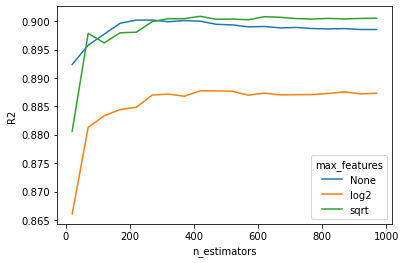

In [44]:
sns.lineplot(data = resultados4, x = 'n_estimators', y='R2', hue = 'max_features')

**Comentario**

Curiosamente, con max_feature="sqrt" muestra un rendimiento (R2) parecido al usar "None" en este mismo hiperparámetro.

Por otro lado, el mejor modelo con mejor R2 tiene las siguientes características:

In [47]:
resultados4.sort_values(by = "R2", ascending=False).head(1)

,MAE,MSE,R2,max_features,model,n_estimators
48,15507.98339,6.097043e+08,0.900862,sqrt,rf max_features=sqrt | n_estimators=420,420.0


# Ejercicio 5: Refactoriza el modelo

- En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

In [50]:
final_model = RandomForestRegressor(
            n_estimators=420,
            max_features='sqrt', 
            random_state=123,
            n_jobs=-1,
            oob_score=True,
            verbose=2).fit(X_train, y_train)
y_pred = final_model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 420building tree 2 of 420building tree 3 of 420


building tree 4 of 420
building tree 5 of 420building tree 6 of 420
building tree 7 of 420

building tree 8 of 420building tree 9 of 420

building tree 10 of 420
building tree 11 of 420
building tree 12 of 420
building tree 13 of 420
building tree 14 of 420
building tree 15 of 420building tree 16 of 420building tree 17 of 420


building tree 18 of 420
building tree 19 of 420building tree 20 of 420

building tree 21 of 420building tree 22 of 420building tree 23 of 420


building tree 24 of 420
building tree 25 of 420
building tree 26 of 420
building tree 27 of 420
building tree 28 of 420
building tree 29 of 420building tree 30 of 420building tree 31 of 420building tree 32 of 420



building tree 33 of 420building tree 34 of 420building tree 35 of 420


building tree 36 of 420
building tree 37 of 420
building tree 38 of 420building tree 39 of 420building tree 40 of 420


building tree 41 of 420building tree 42 of 420

b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s


building tree 276 of 420
building tree 277 of 420
building tree 278 of 420
building tree 279 of 420
building tree 280 of 420building tree 281 of 420building tree 282 of 420
building tree 283 of 420building tree 284 of 420

building tree 285 of 420

building tree 286 of 420building tree 287 of 420


building tree 288 of 420
building tree 289 of 420
building tree 290 of 420
building tree 291 of 420
building tree 292 of 420building tree 293 of 420building tree 294 of 420
building tree 295 of 420


building tree 296 of 420building tree 297 of 420building tree 298 of 420

building tree 299 of 420
building tree 300 of 420

building tree 301 of 420
building tree 302 of 420
building tree 303 of 420building tree 304 of 420
building tree 305 of 420

building tree 306 of 420building tree 307 of 420

building tree 308 of 420
building tree 309 of 420
building tree 310 of 420
building tree 311 of 420
building tree 312 of 420
building tree 313 of 420
building tree 314 of 420
building tree 315 of 420b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.5s finished


building tree 411 of 420building tree 412 of 420

building tree 413 of 420building tree 414 of 420building tree 415 of 420
building tree 416 of 420building tree 417 of 420building tree 418 of 420building tree 419 of 420





building tree 420 of 420


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 420 out of 420 | elapsed:    0.0s finished


,MAE,MSE,R2,model
0,15507.98339,6.097043e+08,0.900862,rf_mejores_metricas


In [51]:
resultadofinal = pd.DataFrame()

resultadofinal = resultadofinal.append(
    {"model":"rf_mejores_metricas",
     "MAE":mean_absolute_error(y_test, y_pred),
     "MSE":mean_squared_error(y_test, y_pred),
     "R2":r2_score(y_test, y_pred)},
    ignore_index=True
)
resultadofinal

,MAE,MSE,R2,model
0,15507.98339,6.097043e+08,0.900862,rf_mejores_metricas


**Comentario**

Es curioso que las mejores métricas de con n_estimator=420, apesar de que después se usan más, pero bueno, este número arrojó con la semilla=123, por otro lado tenemos un r2 de 0.9, el buen es bastante bueno desde mi opinión, los errores MSE y MAE también son pequeños, fue una grata experiencia trabajar con randomfores y generar esta "grilla" que además nos permite generar un df con los resultados (resultados4)